In [1]:
import sys, os
sys.path.append('../src/')
from Biologging_Toolkit.applications.Rain import Rain
from Biologging_Toolkit.applications.Wind import Wind
import Biologging_Toolkit.utils.rain_empirical_utils as R_Utils

import pandas as pd
import numpy as np
import seaborn as sns
import netCDF4
from itertools import permutations

import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams['text.usetex'] = False

import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

from sklearn.linear_model import LinearRegression
import optuna
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, mean_absolute_error, root_mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from khiops.sklearn import KhiopsClassifier

import re
from tqdm import tqdm

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit


In [2]:
depids = ['ml17_280a','ml18_296a','ml18_294b','ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_295a','ml21_305b']
path = 'E:/individus_filtered/'
# freqs = [50, 100, 200, 300, 500, 1000, 2500, 5000, 8000, 10000, 12000, 15000]
freqs = [500, 1000, 2500, 5000, 8000, 10000, 12000, 15000, 16000,20000]
features_csv = ['downwards_mean_500', 'downwards_mean_1000', 'downwards_mean_2500',
       'downwards_mean_5000', 'downwards_mean_8000', 'downwards_mean_10000',
       'downwards_mean_12000', 'downwards_mean_15000', 'downwards_mean_16000','upwards_mean_20000','upwards_mean_5000']

# Insertion SPL .csv

In [153]:
depids_subset = ['ml18_296a','ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_295a','ml21_305b']

for depid in depids_subset:
    print(f"{depid} :")
    spl_to_add_list = [2000,8000,15000]
    inst = Wind(depid=depid, path=os.path.join(path,depid), acoustic_path=os.path.join(path,depid,'dives'))
    for freq in spl_to_add_list :
        print(f" >> Working on SPL{freq}")
        inst.fetch_data(method = 'upwards', aggregation = 'mean', frequency = freq)


ml18_296a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml19_292a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml19_292b :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml19_293a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml19_294a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml20_293a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml20_296b :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml20_313a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))


ml21_295a :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


ml21_305b :
 >> Working on SPL2000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL8000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


 >> Working on SPL15000


c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:129: RuntimeWarning: Mean of empty slice
  spl.append(agg(_data['spectro'][np.isin(_data['time'], time_mask), idx_freq]))
c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\applications\Wind.py:130: RuntimeWarning: Mean of empty slice
  wind_speed.append(agg(dive.ds['wind_speed'][:].data[(dive.ds['dives'][:].data == row.dive) & mask]))


# Ajout de Spectral Slope

In [3]:
def calculate_and_add_slope(df, freq1, freq2):
    slope_column_name = f"slope_{freq1}_{freq2}"
    spl1 = df[f'upwards_mean_{freq1}']
    spl2 = df[f'upwards_mean_{freq2}']
    delta_spl = spl2 - spl1
    delta_log_freq = np.log10(freq2) - np.log10(freq1)
    slope = delta_spl / delta_log_freq
    df[slope_column_name] = slope 
    return df

In [ ]:
depid = "ml17_280a"
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
df['slope_8_15'] = df['upwards_mean_15000'] / df['upwards_mean_8000']

df.to_csv(path + f'/{depid}/{depid}_dive.csv', index=False)

# Visualisation Spectrogrammes

In [15]:
depid = "ml17_280a"
feature = "precipitation_GPM"
df = R_Utils.load_df(depid,path, feature)

rain_df = df.loc[df[feature] >=1]
noRain_df = df.loc[df[feature]<1]
wind_df = df.loc[df["wind_speed"]>=15]

d_df = [datetime.fromtimestamp(ts) for ts in df['begin_time']]
d_wdf = [datetime.fromtimestamp(ts) for ts in wind_df['begin_time']]
d_Rdf = [datetime.fromtimestamp(ts) for ts in rain_df['begin_time']]
d_NRdf = [datetime.fromtimestamp(ts) for ts in noRain_df['begin_time']]

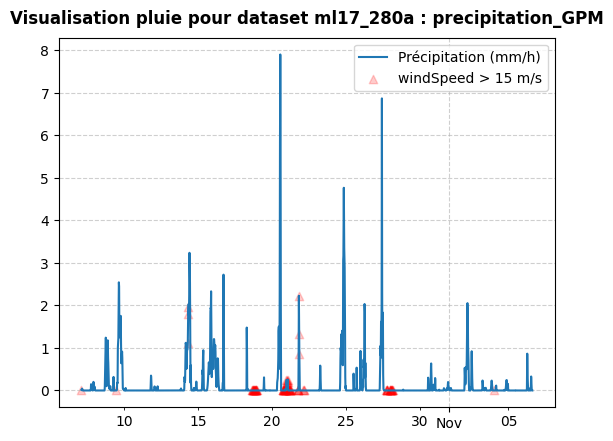

In [17]:
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_minor_locator(mdates.DayLocator(bymonthday=[5,10,15,20,25,30])) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b')) 
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

plt.title(f'Visualisation pluie pour dataset {depid} : {feature}', fontsize=12, fontweight='bold', pad=10)
plt.plot(d_df, df[feature], label = "Précipitation (mm/h)")
plt.scatter(d_wdf,wind_df[feature], c="red", marker="^", label="windSpeed > 15 m/s", alpha=0.2)
# plt.scatter(d_Rdf,rain_df[feature], c="red", marker="^", label="Précipitations > 1mm/h")
# plt.scatter(d_NRdf,noRain_df[feature], c="black", marker="x", label="Précipitations > 1mm/h", alpha=0.2)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

---
### Application d'une PCA pour faire du clustering
---

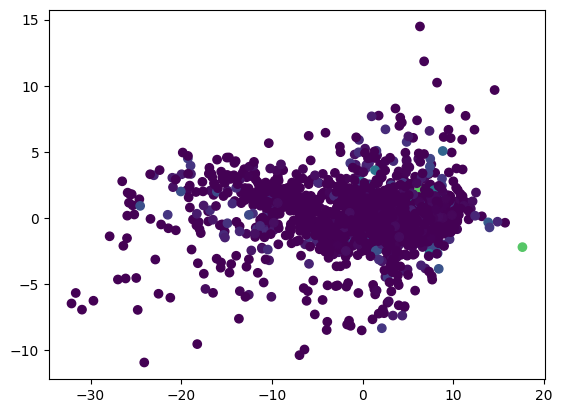

In [ ]:
depid = "ml17_280a"
df_before_pca = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
feature = "precipitation_GPM"
factor = 1000 if feature.startswith('tp') else 1
df_pca = df[["upwards_mean_2000", "upwards_mean_5000", "upwards_mean_8000", "upwards_mean_15000", "upwards_mean_20000"]]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)

df_principal = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_principal[feature] = df_before_pca[feature]

plt.scatter(df_principal["PC1"], df_principal['PC2'], c=df_principal[feature], cmap='viridis')


---
### Plot des spectrogrammes de plongées interressantes
---

In [ ]:
def plot_spectro(dive_number=0, path='E:/individus_filtered/', depid = 'ml17_280a'):
    spectr_path = f"{path}{depid}/dives/acoustic_dive_{dive_number:05}.npz"
    data = np.load(spectr_path)
    df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')

    time = data['time']
    freq = data['freq']
    spectro = data['spectro']

    plt.figure(figsize=(20,5)) 
    plt.imshow(spectro.T, aspect='auto', cmap='viridis', interpolation='none',
            extent=[(time.min()-time.min())/60, (time.max()-time.min())/60, freq.max(), freq.min()], vmin=-100, vmax=50)
    plt.colorbar(label='Intensity')
    plt.xlabel('Time (min)')
    plt.ylabel('Frequency (Hz)')

    try:
        plt.title(f'Spectrogramme {depid} plongée n°{dive_number}\n {feature}={round(df[feature][dive_number],1)}mm/h, NystuenReg={round(opt_results_RE_Nystuen_8KHz[dive_number],1)}mm/h wind={round(df["wind_speed"][dive_number],1)}m/s \nSPL2:{round(df['upwards_mean_2000'][dive_number],1)}, SPL5:{round(df['upwards_mean_5000'][dive_number],1)}, SPL8:{round(df['upwards_mean_8000'][dive_number],1)}, SPL15:{round(df['upwards_mean_15000'][dive_number],1)}, SPL20:{round(df['upwards_mean_20000'][dive_number],1)}', fontsize=12, fontweight='bold', pad=10)
    except NameError:
        plt.title(f'Spectrogramme {depid} plongée n°{dive_number}\n {feature}={round(df[feature][dive_number],3)}mm/h, wind={df["wind_speed"][dive_number]}m/s\nSPL2:{round(df['upwards_mean_2000'][dive_number],1)}, SPL5:{round(df['upwards_mean_5000'][dive_number],1)}, SPL8:{round(df['upwards_mean_8000'][dive_number],1)}, SPL15:{round(df['upwards_mean_15000'][dive_number],1)}, SPL20:{round(df['upwards_mean_20000'][dive_number],1)}', fontsize=12, fontweight='bold', pad=10)
    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f"C:/Users/barsro/Documents/data-exploration/exports/spectro_ml17_280a/spectro_{depid}_dive-{dive_number}.png")
    plt.show()

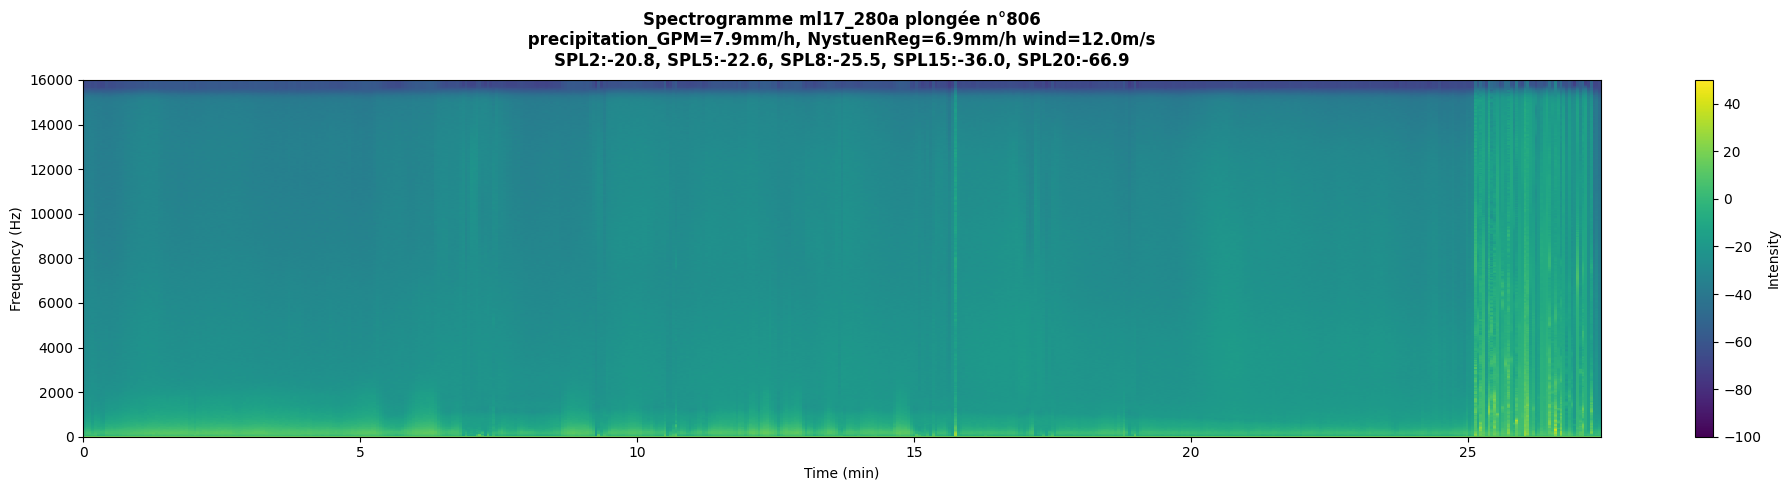

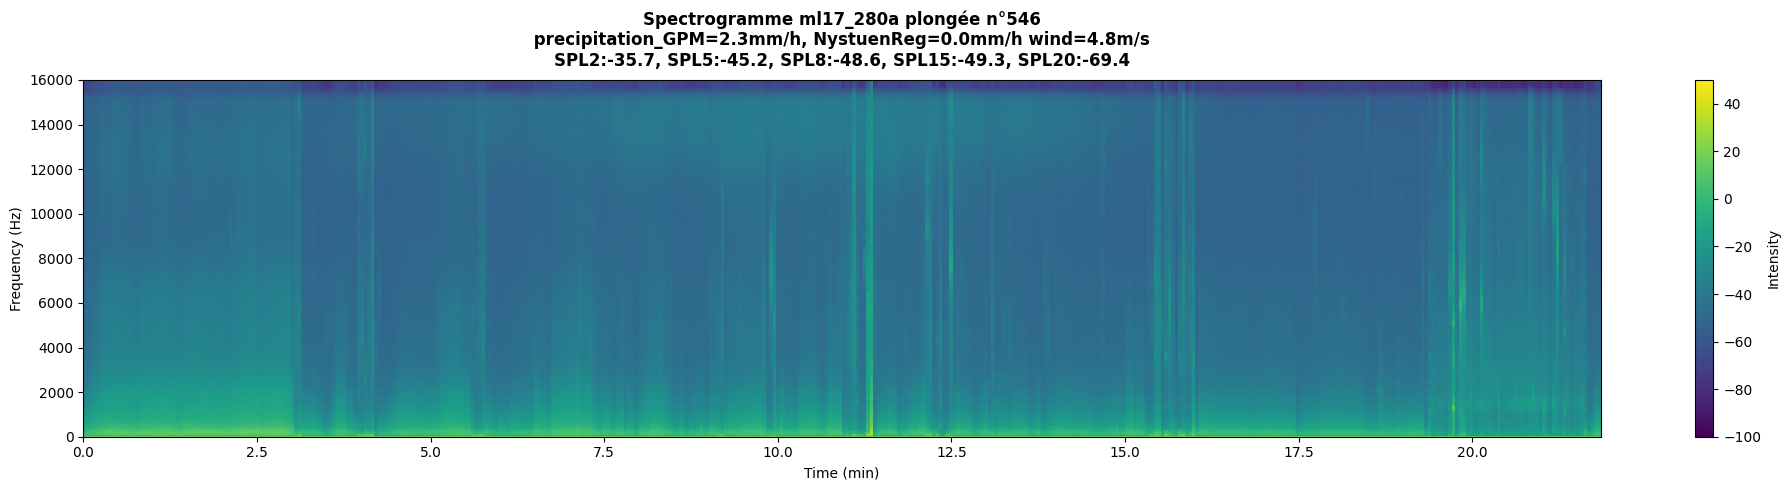

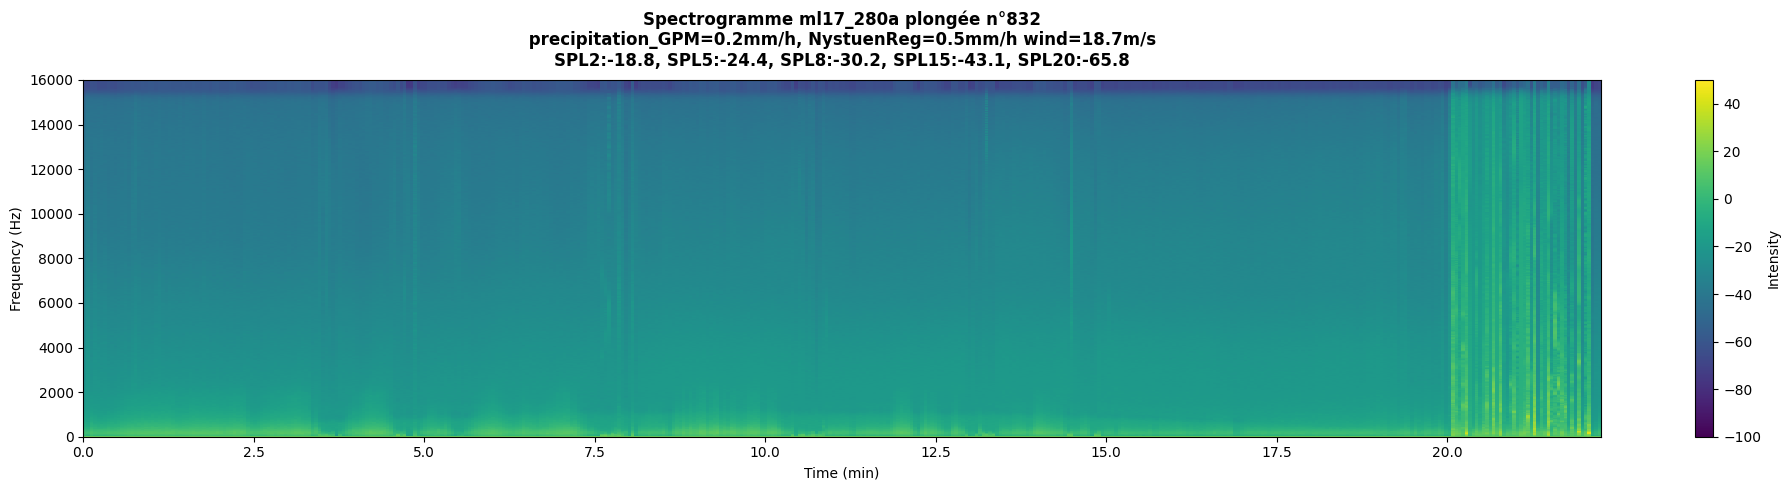

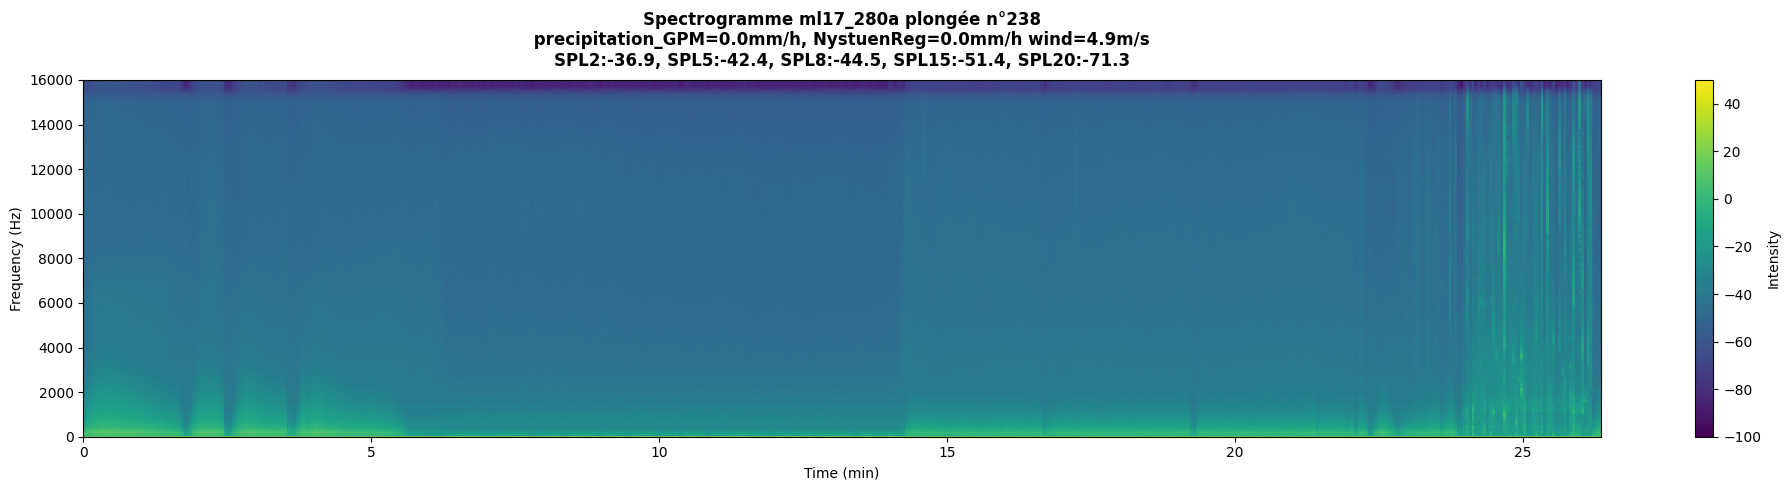

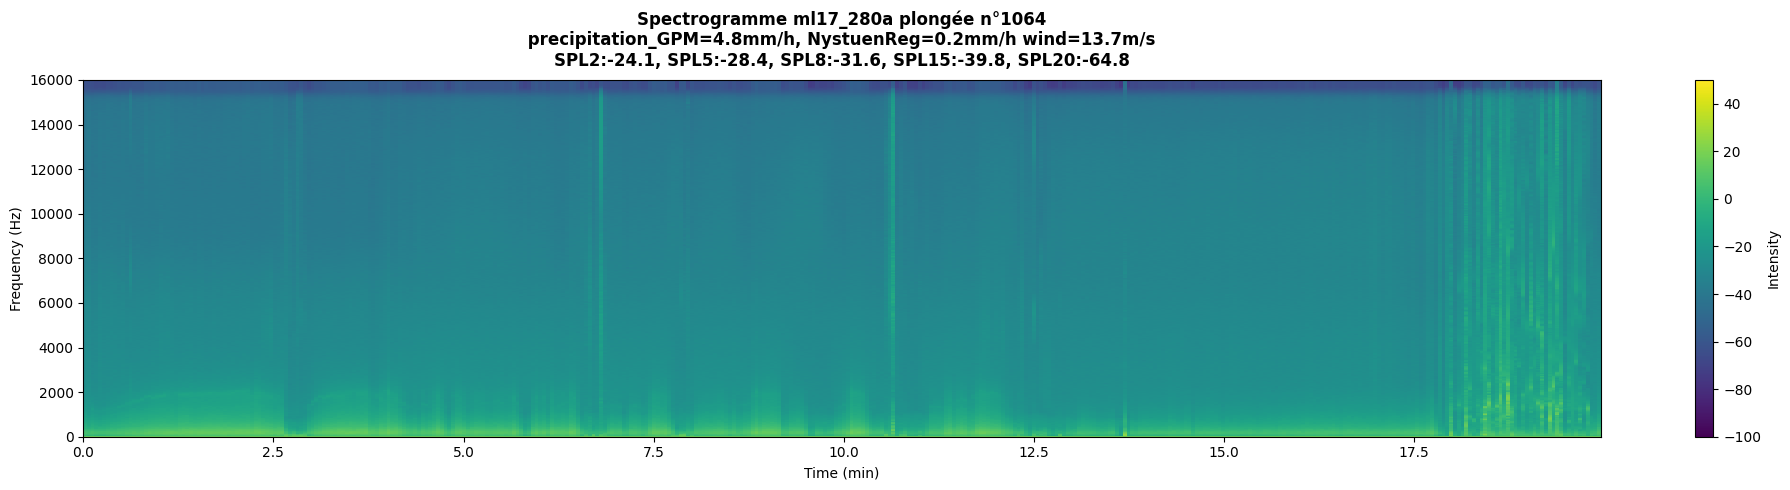

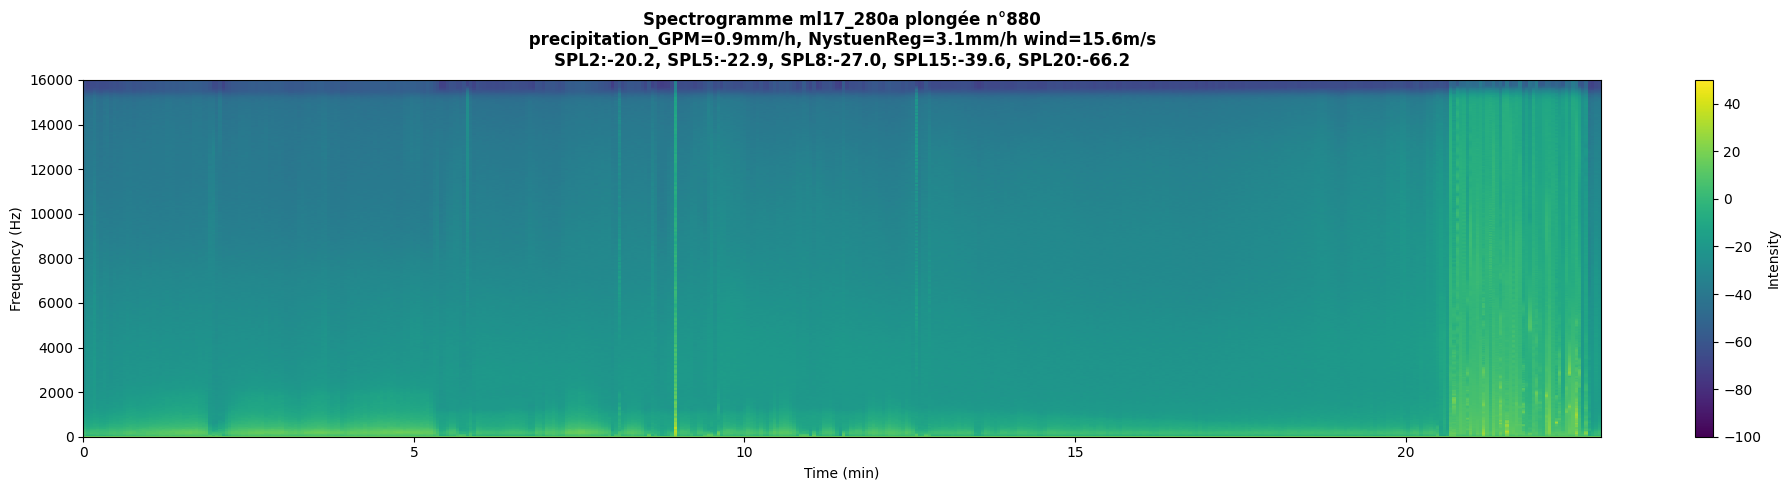

In [11]:
dive_list = [806, 546, 832, 238, 1064, 880]
df = pd.DataFrame()
for dive in dive_list[:] :
    plot_spectro(dive_number=dive)

# plot_spectro(dive_number=int(rain_df["dive"].iloc[0]))
# plot_spectro(dive_number=int(noRain_df["dive"].iloc[0]))

## Benchmark de différents algorithmes empiriques pour la detection et l'estimation d'évenements pluvieux
#### 1-Detection:
- Ma et Nystuen, 2005, "Passive Acoustic Detection and Measurement of Rainfall at Sea"
- Nystuen, 2014, "Monitoring Greek Seas Using Passive Underwater Acoustics"
- Nystuen, 1997, "Weather Classification Using Passive Acoustic Drifters"

#### 2-Estimation:
- KK Noufal, 2025, "Rainfall estimation through ambient noise measurements in the deep waters of the southeast Arabian Sea"
- Anagnostou, 2008, "Evaluation of Underwater Rainfall Measurements During the Ionian Sea Rainfall Experiment"
- Pensieri, 2015, "Evaluation of Underwater Rainfall Measurements During the Ionian Sea Rainfall Experiment"
- Nystuen, 2014, "Monitoring Greek Seas Using Passive Underwater Acoustics"
- Ma et Nystuen, 2005, "Passive Acoustic Detection and Measurement of Rainfall at Sea"
- Nystuen, 1997, "Weather Classification Using Passive Acoustic Drifters"

C:\Users\barsro\AppData\Local\Temp\ipykernel_12956\1476773111.py:48: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(value, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


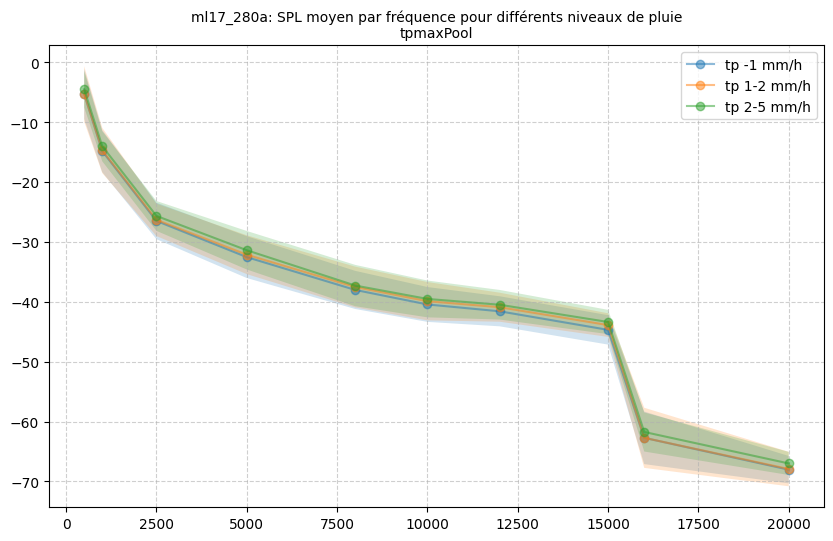

In [86]:
depid = depids[0]
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
precip_value = 'tpmaxPool'

spll = {"-1": [], "1-2": [], "2-5": [], "5-": []}

for row in df.iterrows():
    row = row[1]
    
    if row[precip_value] < 0.001 :
        spl_000  = []
        for freq in freqs:
            if freq == 20000:
                spl_000.append(row[f"upwards_mean_{freq}"])
            else:
                spl_000.append(row[f"downwards_mean_{freq}"])
        spll["-1"].append(spl_000)

    elif 0.001 < row[precip_value] < 0.002 :
        spl_001 = []
        for freq in freqs:
            if freq == 20000:
                spl_001.append(row[f"upwards_mean_{freq}"])
            else:
                spl_001.append(row[f"downwards_mean_{freq}"])
        spll["1-2"].append(spl_001)

    elif 0.002 < row[precip_value] < 0.005 :
        spl_002 = []
        for freq in freqs:
            if freq == 20000:
                spl_002.append(row[f"upwards_mean_{freq}"])
            else:
                spl_002.append(row[f"downwards_mean_{freq}"])
        spll["2-5"].append(spl_002)

    elif row[precip_value] > 0.005 :
        spl_005 = []
        for freq in freqs:
            if freq == 20000:
                spl_005.append(row[f"upwards_mean_{freq}"])
            else:
                spl_005.append(row[f"downwards_mean_{freq}"])
        spll["5-"].append(spl_005)

plt.figure(figsize=(10, 6))
for key, value in spll.items():
    mean_spl = np.nanmean(value, axis=0)
    std_spl = np.nanstd(value, axis=0)
    if value != [] :
    # print(f"{key} : {len(value)} - {mean_spl} - {std_spl}")
        plt.plot(freqs, mean_spl, marker='o', alpha=0.5, label=f"tp {key} mm/h")
        plt.fill_between(freqs, mean_spl - std_spl, mean_spl + std_spl, alpha=0.2)
plt.legend(loc='upper right')
plt.title(f"{depid}: SPL moyen par fréquence pour différents niveaux de pluie\n{precip_value}", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




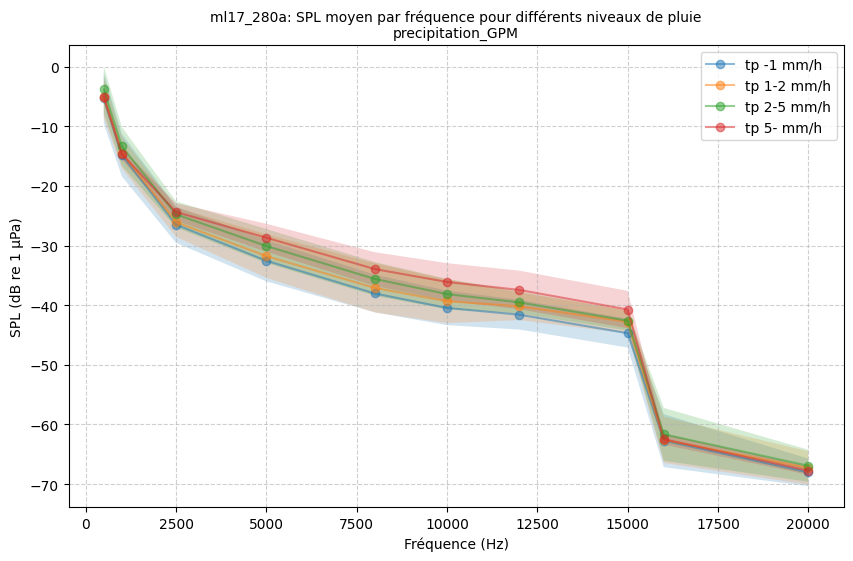

In [92]:
depid = depids[0]
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
precip_value = 'precipitation_GPM'

spll = {"-1": [], "1-2": [], "2-5": [], "5-": []}

for row in df.iterrows():
    row = row[1]
    
    if row[precip_value] < 1 :
        spl_000  = []
        for freq in freqs:
            if freq == 20000:
                spl_000.append(row[f"upwards_mean_{freq}"])
            else:
                spl_000.append(row[f"downwards_mean_{freq}"])
        spll["-1"].append(spl_000)

    elif 1 < row[precip_value] < 2 :
        spl_001 = []
        for freq in freqs:
            if freq == 20000:
                spl_001.append(row[f"upwards_mean_{freq}"])
            else:
                spl_001.append(row[f"downwards_mean_{freq}"])
        spll["1-2"].append(spl_001)

    elif 2 < row[precip_value] < 5 :
        spl_002 = []
        for freq in freqs:
            if freq == 20000:
                spl_002.append(row[f"upwards_mean_{freq}"])
            else:
                spl_002.append(row[f"downwards_mean_{freq}"])
        spll["2-5"].append(spl_002)

    elif row[precip_value] > 5 :
        spl_005 = []
        for freq in freqs:
            if freq == 20000:
                spl_005.append(row[f"upwards_mean_{freq}"])
            else:
                spl_005.append(row[f"downwards_mean_{freq}"])
        spll["5-"].append(spl_005)

plt.figure(figsize=(10, 6))
for key, value in spll.items():
    mean_spl = np.nanmean(value, axis=0)
    std_spl = np.nanstd(value, axis=0)
    # print(f"{key} : {len(value)} - {mean_spl} - {std_spl}")
    plt.plot(freqs, mean_spl, marker='o', alpha=0.5, label=f"tp {key} mm/h")
    plt.fill_between(freqs, mean_spl - std_spl, mean_spl + std_spl, alpha=0.2)
plt.legend(loc='upper right')
plt.title(f"{depid}: SPL moyen par fréquence pour différents niveaux de pluie\n{precip_value}", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("SPL (dB re 1 µPa)")
plt.show()



# 1 Detection
### Fonctions des méthodes empiriques de la litterature

In [4]:
def detect_rain_from_ds(df, feature):
    df["Rain_Type"] = "None"
    intensity = df[feature]

    df.loc[(intensity > 0.01) & (intensity <= 1), "Rain_Type"] = "D"
    df.loc[(intensity > 1) & (intensity <= 7.5), "Rain_Type"] = "MR"
    df.loc[intensity > 7.5, "Rain_Type"] = "HR"
    df.loc[(intensity > 1) & (df["wind_speed"] > 15), "Rain_Type"] = "RW"

    return df

def detect_rain_from_ds_binary(df, feature):
    df["Rain_Type"] = "No-Rain"
    intensity = df[feature]

    df.loc[(intensity > 0.4), "Rain_Type"] = "Rain"

    return df

def detect_rain_from_ds_WR(df, feature):
    df["Rain_Type"] = "N"
    intensity = df[feature]
    wind = df["wind_speed"]
    rain_tresh = 0.1
    wind_tresh = 7

    df.loc[(wind >= wind_tresh) & (intensity <= rain_tresh), "Rain_Type"] = "N"
    df.loc[(wind >= wind_tresh) & (intensity >= rain_tresh), "Rain_Type"] = "N"
    df.loc[(wind <= wind_tresh) & (intensity >= rain_tresh), "Rain_Type"] = "R"

    return df

---
### 1/ Pour un depid
---

### I/ 1) Detection Ma et Nystuen

In [ ]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]#,'ml20_293a'
feature="precipitation_GPM"
df = pd.DataFrame({})
df = R_Utils.load_df(depids[9], path, feature)
df = detect_rain_from_ds_binary(df, feature)

In [37]:
train_df, test_df = train_test_split(df, stratify=df["Rain_Type"])
optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(lambda trial : R_Utils.objective_DE_Ma_Nystuen_2005(trial, train_df), n_trials=200, show_progress_bar=True)
best_params = study.best_params
print(best_params)
opt_results_class = R_Utils.DE_Ma_Nystuen_2005(test_df, **best_params)

  0%|          | 0/200 [00:00<?, ?it/s]

{'cond_1': 186.79145528277874, 'cond_2': 3.07575346371702, 'cond_3': 38.592510023680624, 'cond_4': 64.50782422737429}


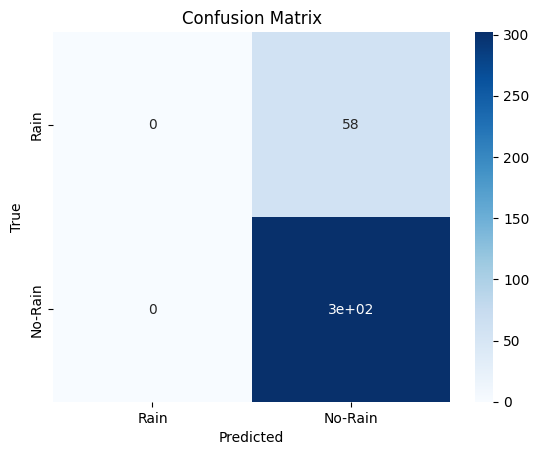

In [38]:
labels = ["Rain","No-Rain"]
cf_matrix = confusion_matrix(test_df["Rain_Type"], opt_results_class["Rain_Type_Preds"], labels=labels)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### I/ 2) Detection Custom

In [45]:
depid = "ml17_280a"
feature="precipitation_GPM"
metrique = "weighted_rain"

df = pd.DataFrame({})
df = R_Utils.load_df(depid, path, feature)
df = detect_rain_from_ds_WR(df, feature)
df = calculate_and_add_slope(df, freq1=2000, freq2=8000)
df = calculate_and_add_slope(df, freq1=8000, freq2=15000)

df_train, df_test = train_test_split(df, random_state=42, stratify=df['Rain_Type'])

In [ ]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]
feature="precipitation_GPM"
depid_test = "ml17_280a"
metrique = "weighted_rain"

df = pd.DataFrame({})
for depid in depids :
    df = pd.concat([df, R_Utils.load_df(depid, path, feature)], ignore_index=True)
df = detect_rain_from_ds_WR(df, feature)
df = calculate_and_add_slope(df, freq1=2000, freq2=8000)
df = calculate_and_add_slope(df, freq1=8000, freq2=15000)

df_train = df.loc[df["depid"]!=depid_test].copy()
df_test = df.loc[df["depid"]==depid_test].copy()

In [41]:

# opt_results_class = R_Utils.DE_Custom_Nystuen_2015(df_test)
# print(R_Utils.rain_only_accuracy_score(df_test["Rain_Type"], opt_results_class["Rain_Type_Preds"]))
# print(opt_results_class['Rain_Type_Preds'].value_counts())

optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial : R_Utils.objective_DE_Custom_Nystuen_2015(trial, df_train, metrique=metrique), n_trials=1000, show_progress_bar=True)
best_params = study.best_params
print(best_params)
opt_results_class = R_Utils.DE_Custom_Nystuen_2015(df_test, **best_params)

  0%|          | 0/1000 [00:00<?, ?it/s]

{'a': -33.97846636424803, 'b': -35.64001207235296, 'c': 0.9252489817407074, 'd': -62.485612097659526, 'e': 1.1558074428608278, 'f': 18.41932368302503}


In [42]:
print(len(df["depid"].value_counts()))

1


NameError: name 'metrique' is not defined

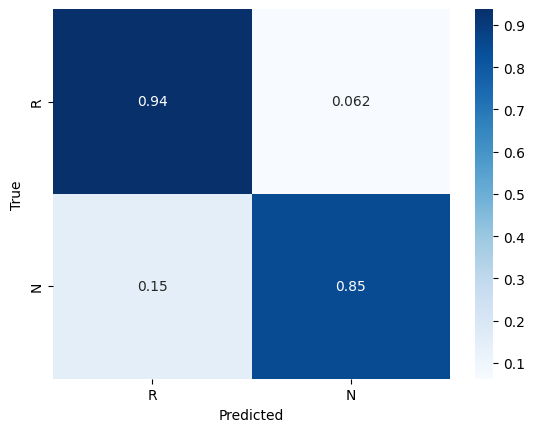

In [44]:
if len(df["depid"].value_counts())>1:
    train_set = f'all-{depid_test}'
    test_set = depid_test
else :
    train_set = f"0.7x{depid_test}"
    test_set = f"0.3x{depid_test}"
labels = ["R","N"]
cf_matrix = confusion_matrix(df_test["Rain_Type"], opt_results_class["Rain_Type_Preds"], labels=labels,normalize="true")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix : train({train_set}) test({test_set})\nfit({metrique})")
plt.tight_layout()
plt.savefig(f"C:/Users/barsro/Documents/data-exploration/exports/detector/CM_train({train_set})_test({test_set})_{metrique}.png")
plt.show()

---
#### Pour tous les depids
---

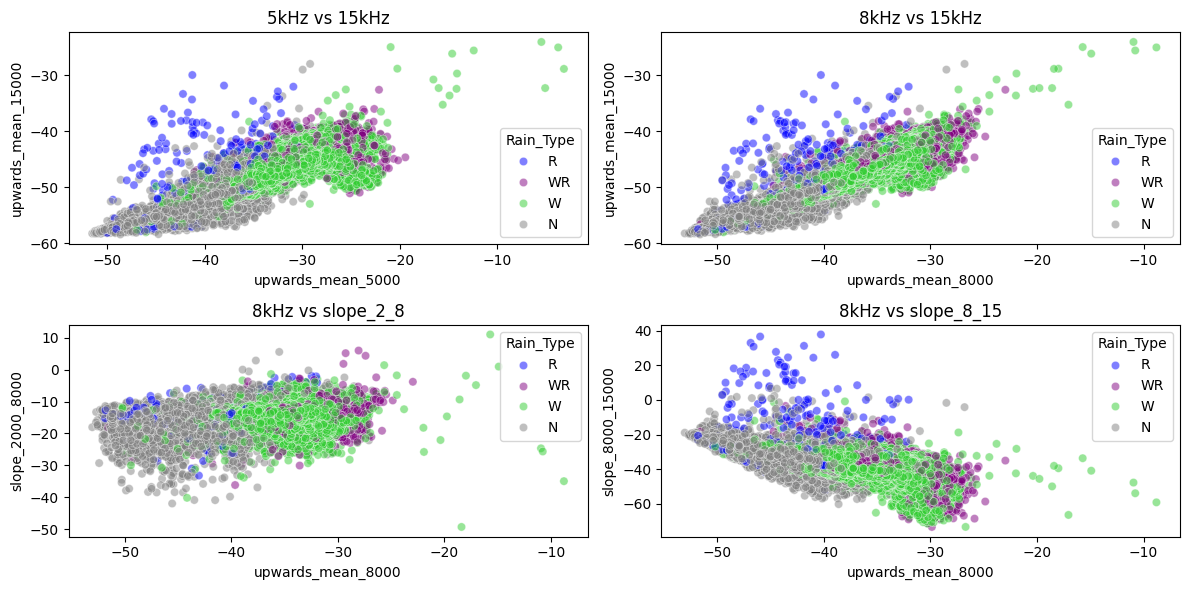

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


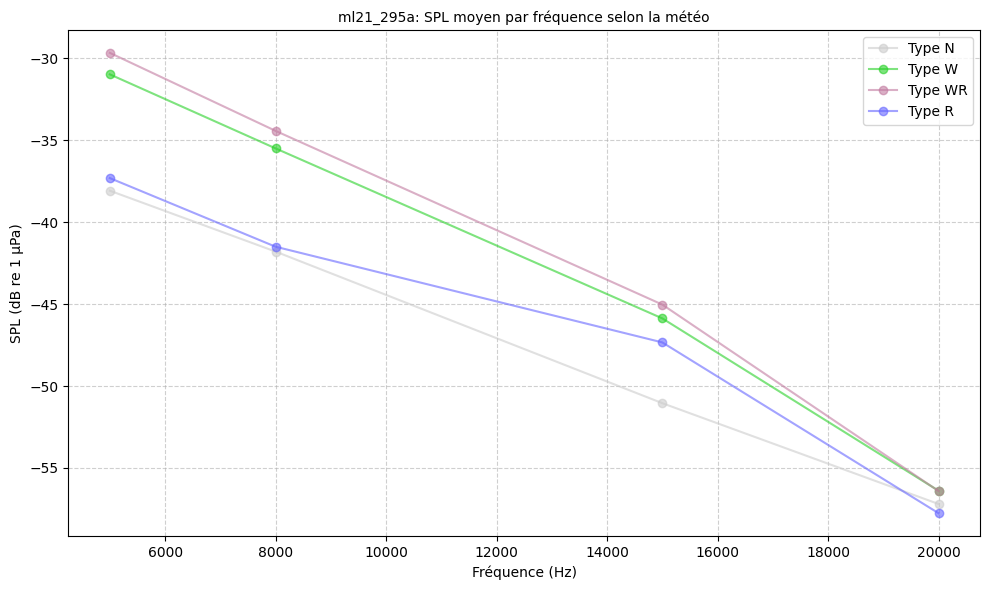

In [44]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]
feature="precipitation_GPM"
df = pd.DataFrame({})
for depid in depids :
    df = pd.concat([df, R_Utils.load_df(depid, path, feature)], ignore_index=True)
df = detect_rain_from_ds_WR(df, feature)

hue_order = ['R', 'WR', "W", "N"]
palette = {'R': 'blue', 'WR': 'purple', "W":"limegreen", "N":"grey"}
df = calculate_and_add_slope(df, freq1=2000, freq2=8000)
df = calculate_and_add_slope(df, freq1=8000, freq2=15000)

fig, axes = plt.subplots(2, 2, figsize=(12,6))
sns.scatterplot(ax=axes[0][0], data=df, x='upwards_mean_5000', y='upwards_mean_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
axes[0][0].set_title('5kHz vs 15kHz')
sns.scatterplot(ax=axes[0][1], data=df, x='upwards_mean_8000', y='upwards_mean_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
axes[0][1].set_title('8kHz vs 15kHz')
sns.scatterplot(ax=axes[1][0], data=df, x='upwards_mean_8000', y='slope_2000_8000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
axes[1][0].set_title('8kHz vs slope_2_8')
sns.scatterplot(ax=axes[1][1], data=df, x='upwards_mean_8000', y='slope_8000_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
axes[1][1].set_title('8kHz vs slope_8_15')
plt.tight_layout()
plt.show()


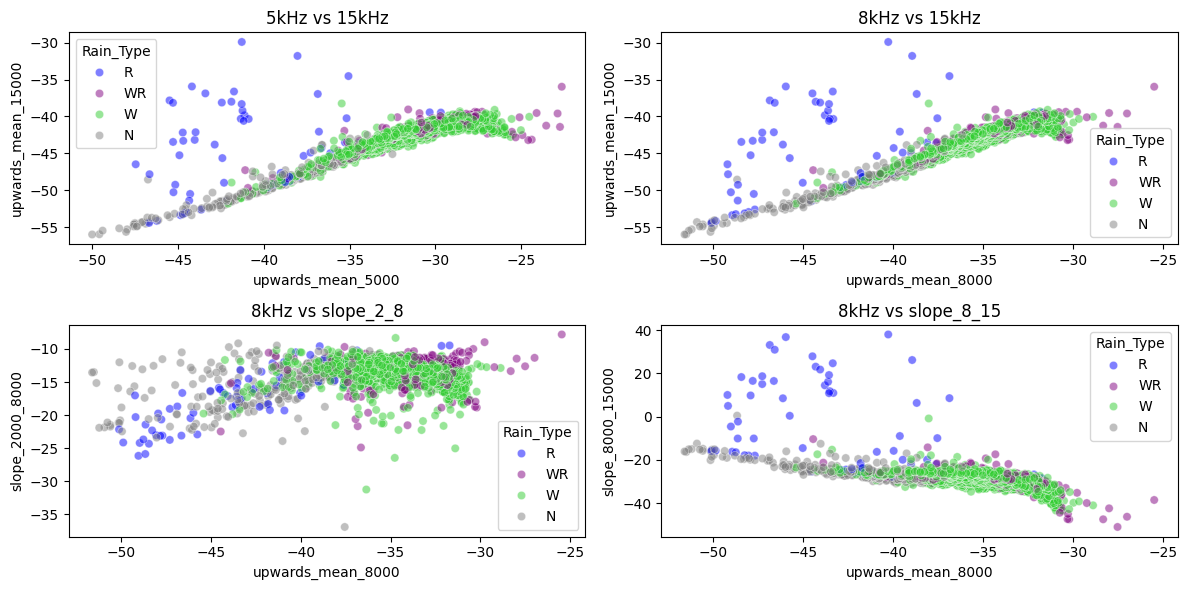

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


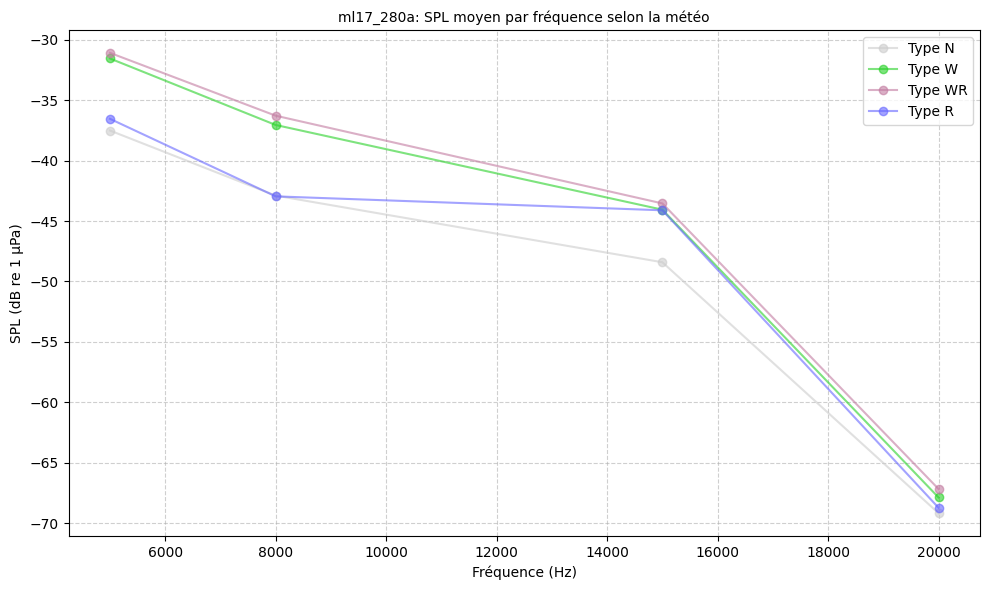

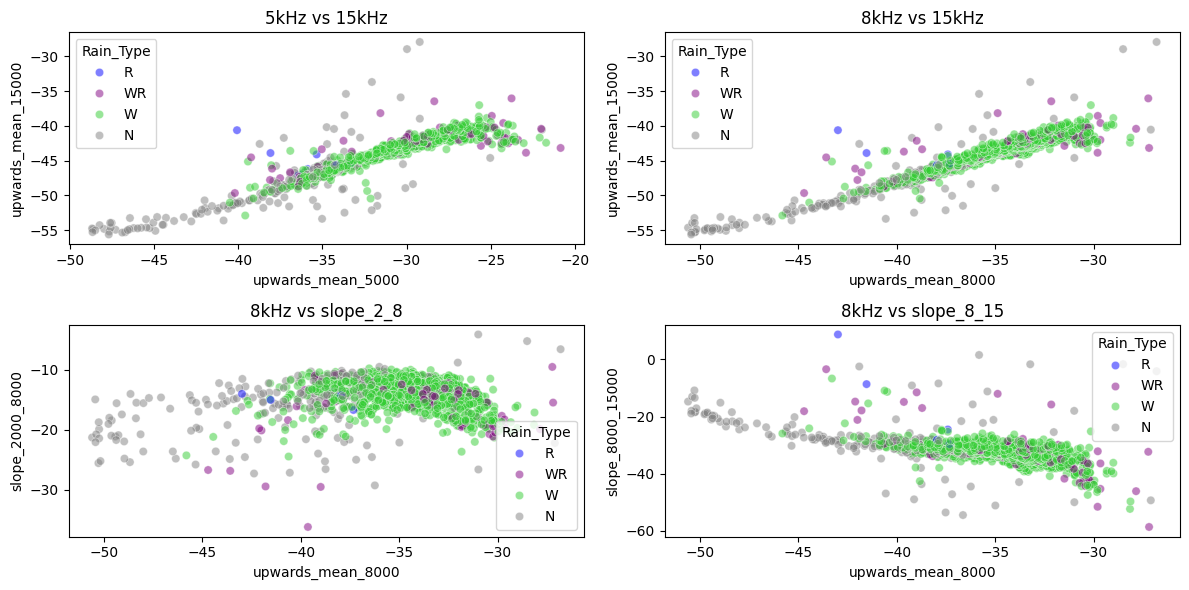

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


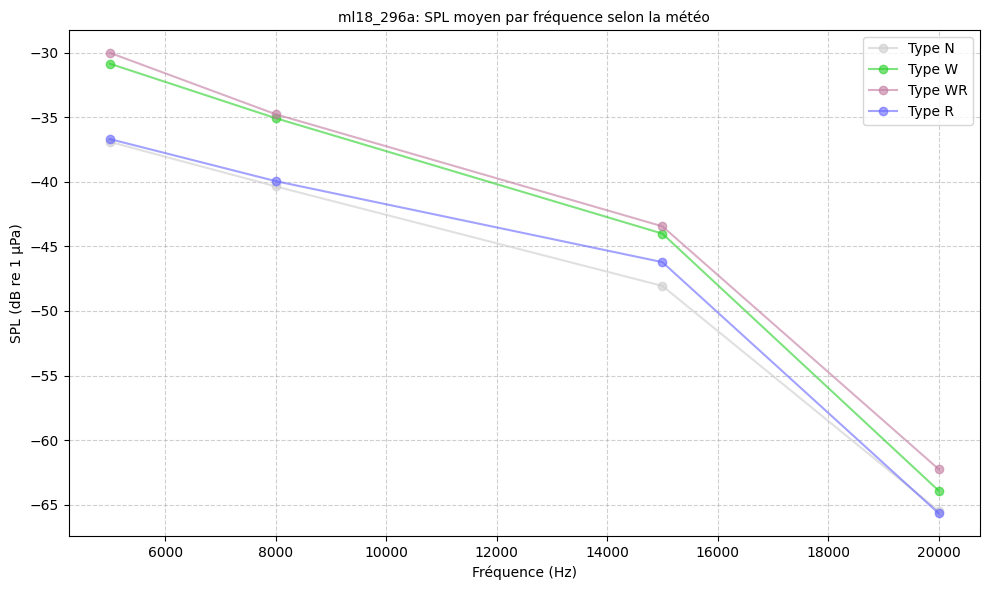

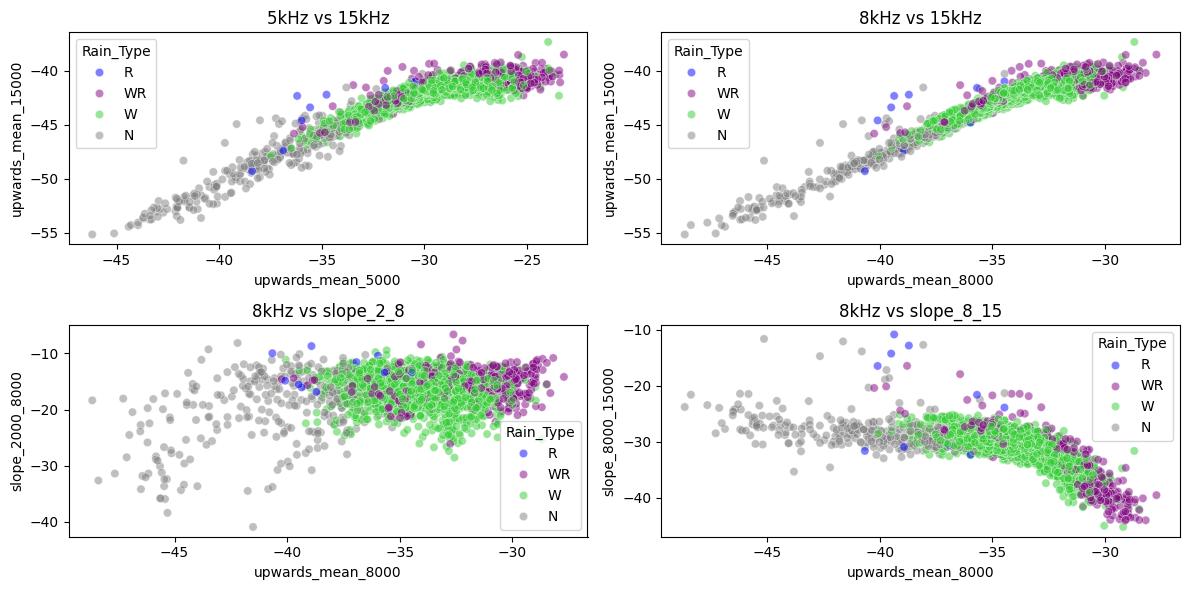

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


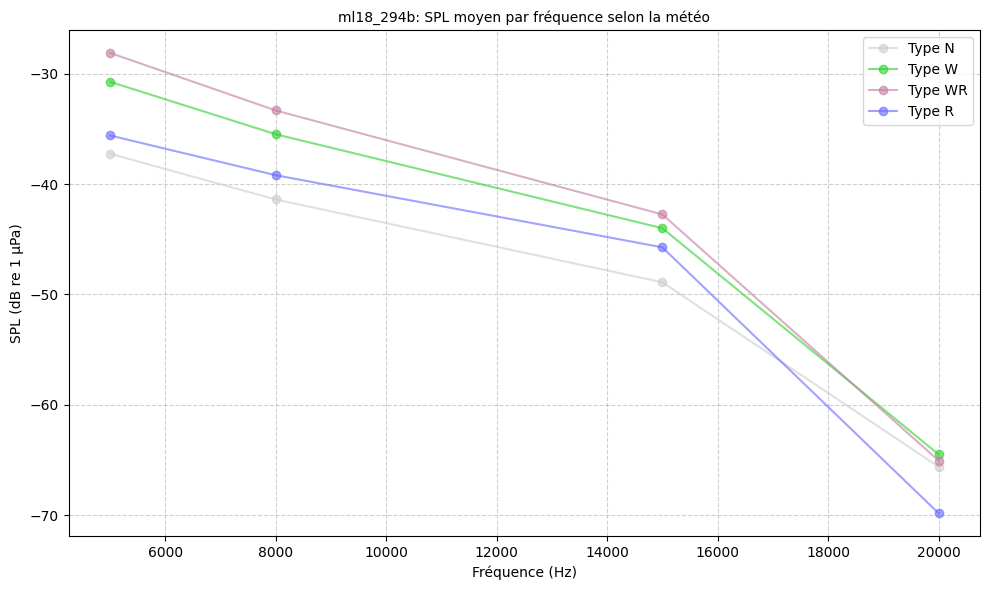

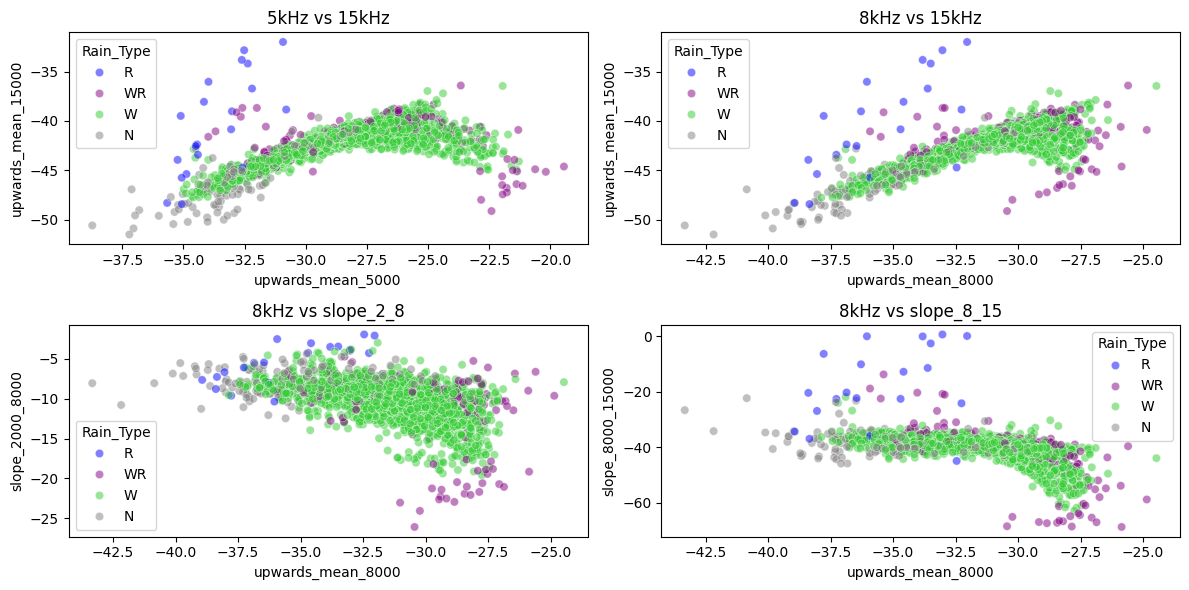

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


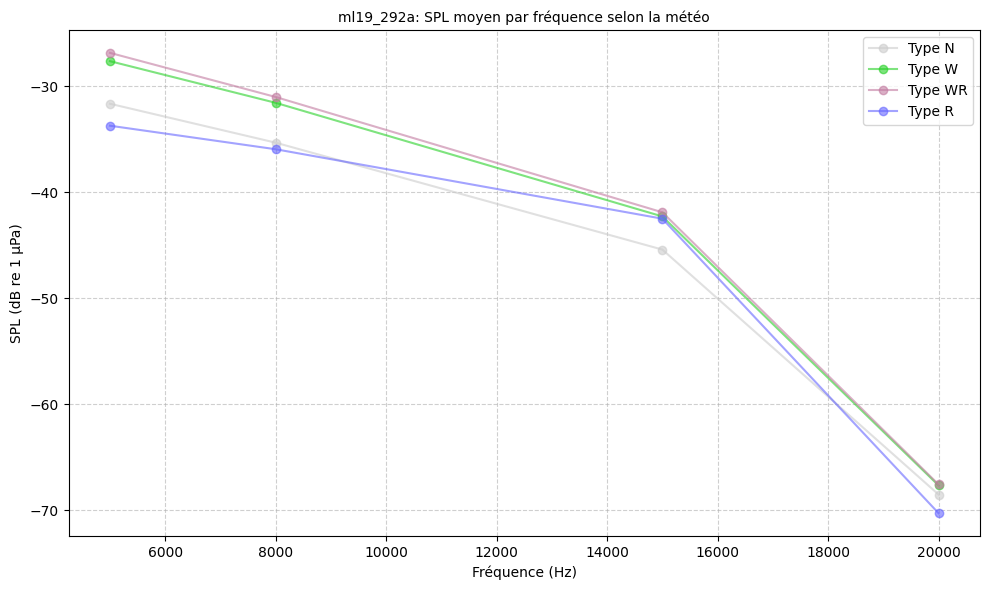

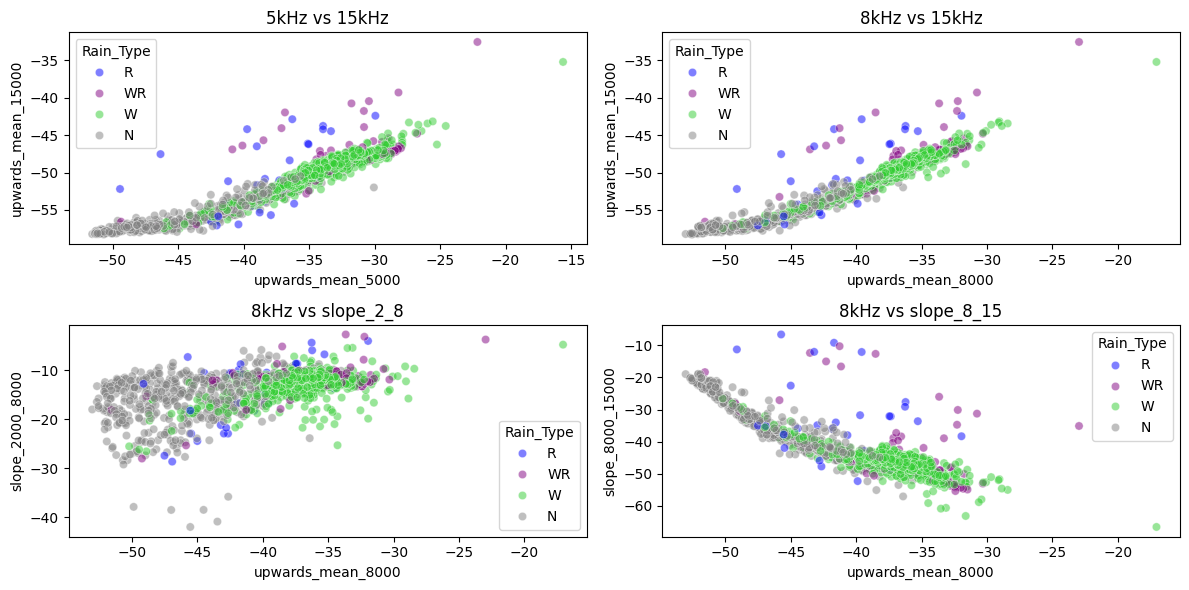

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


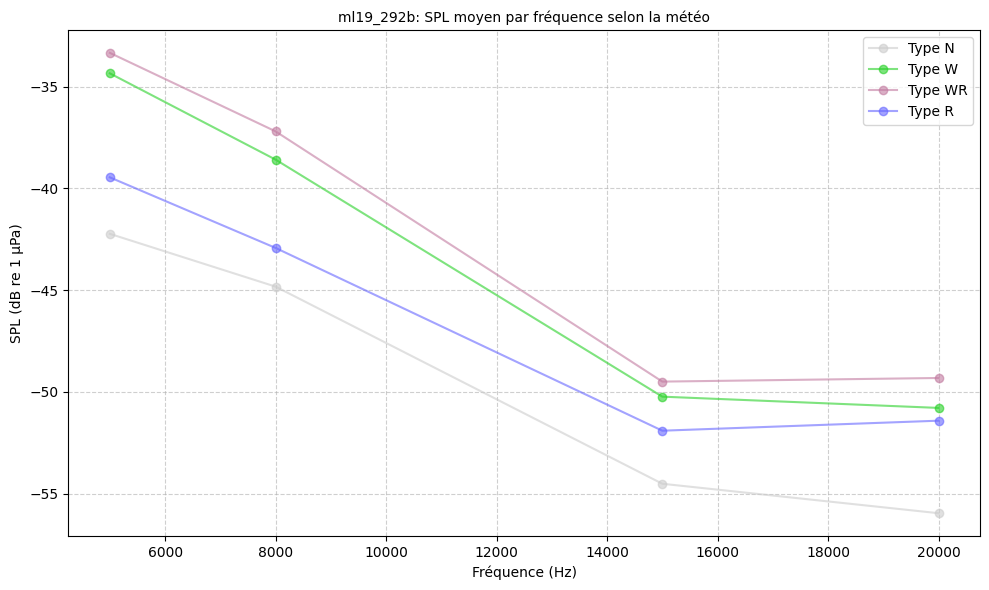

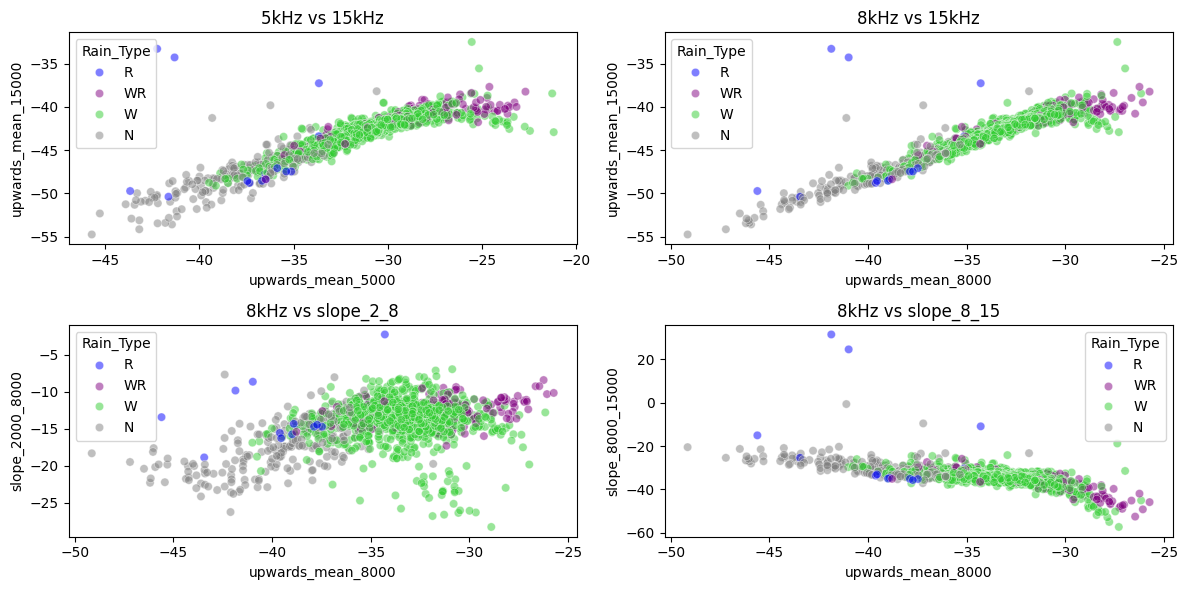

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


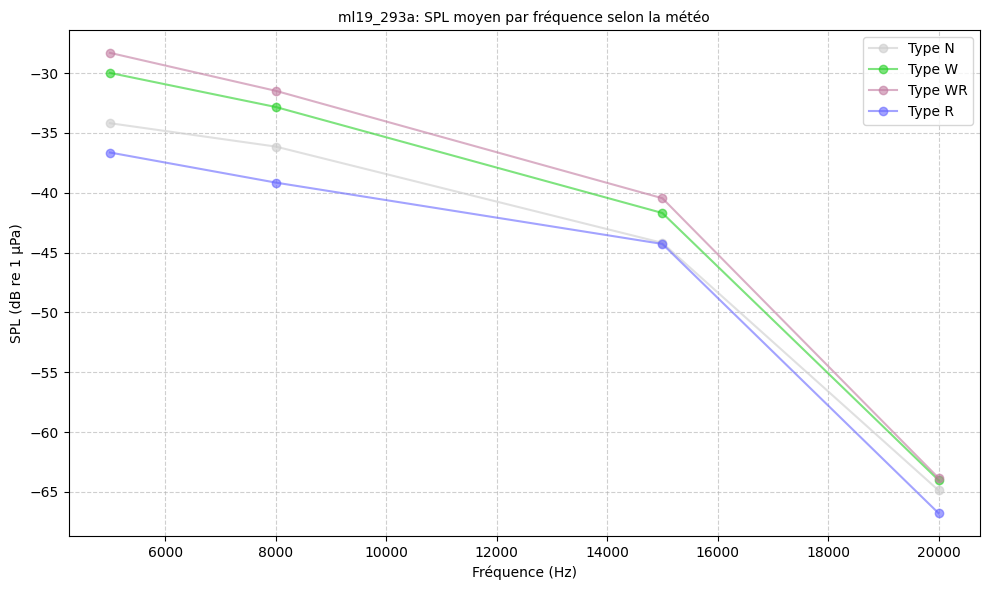

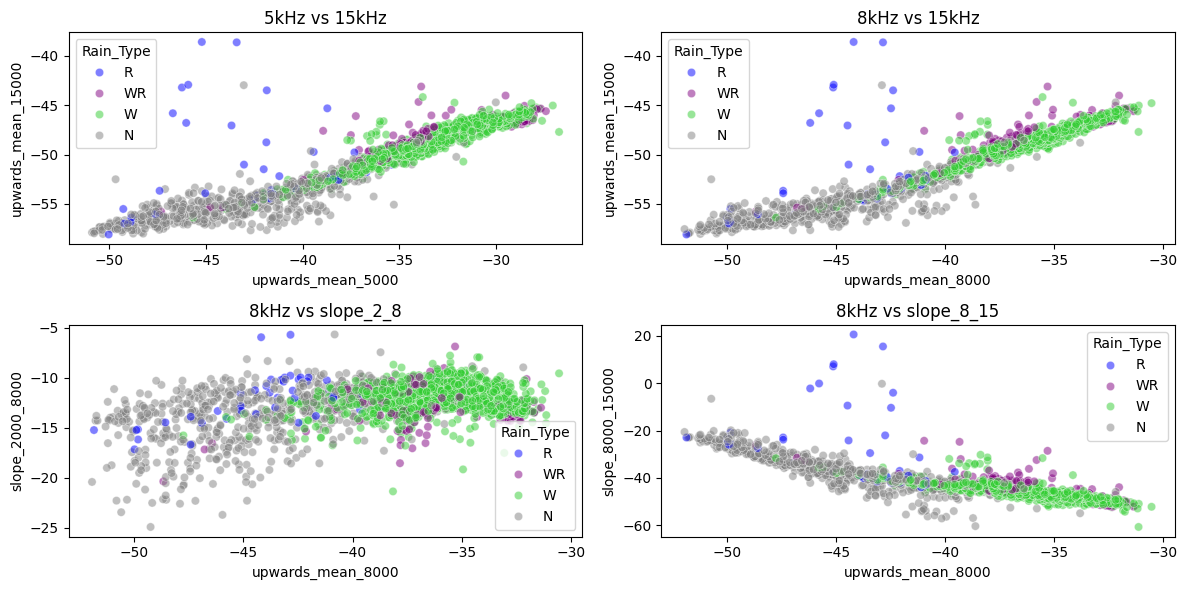

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


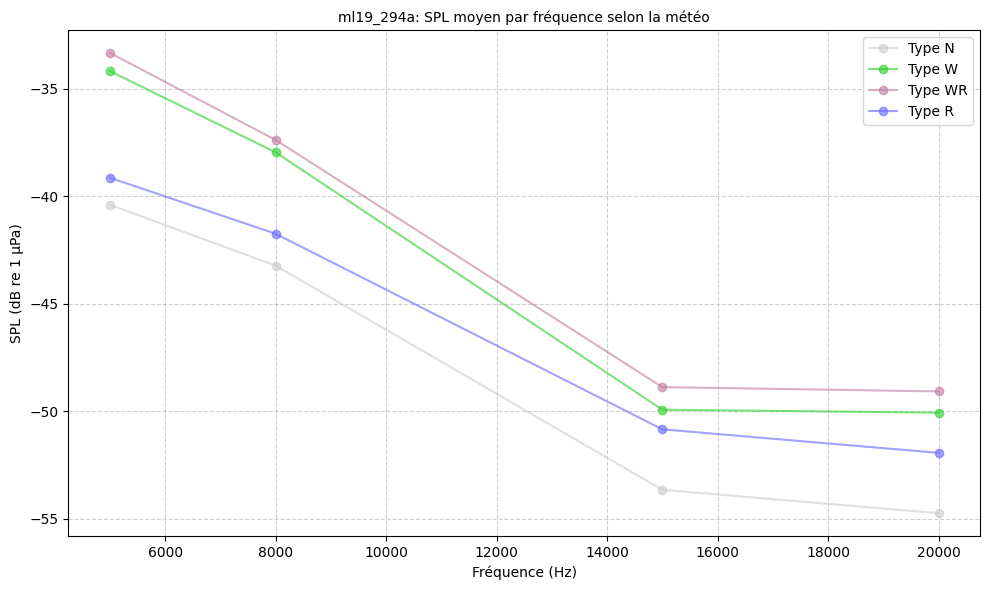

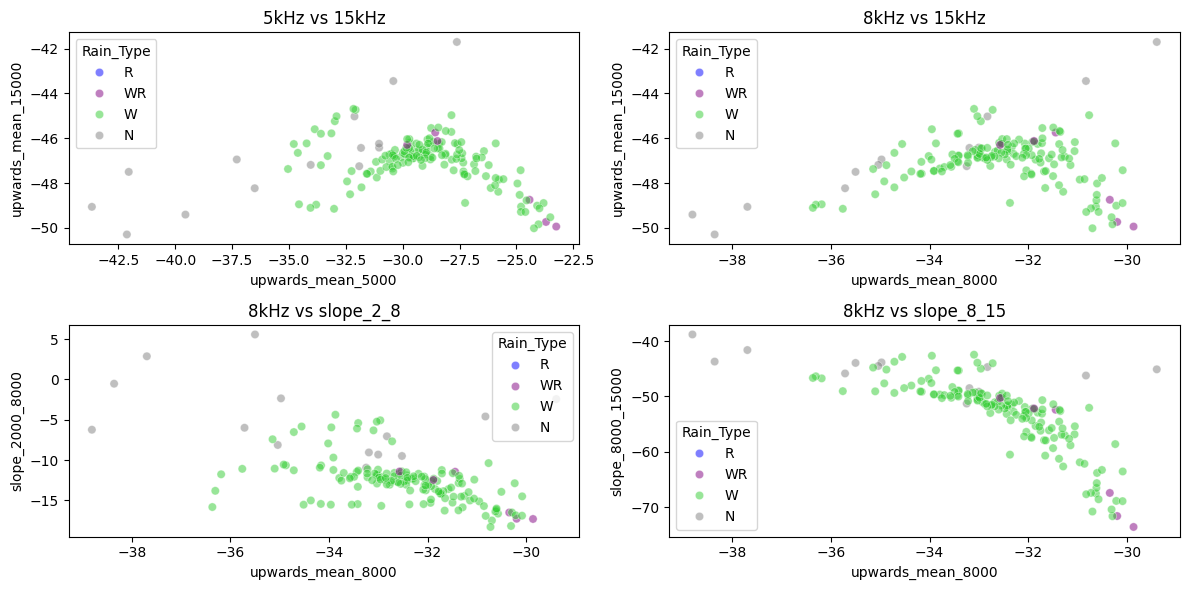

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


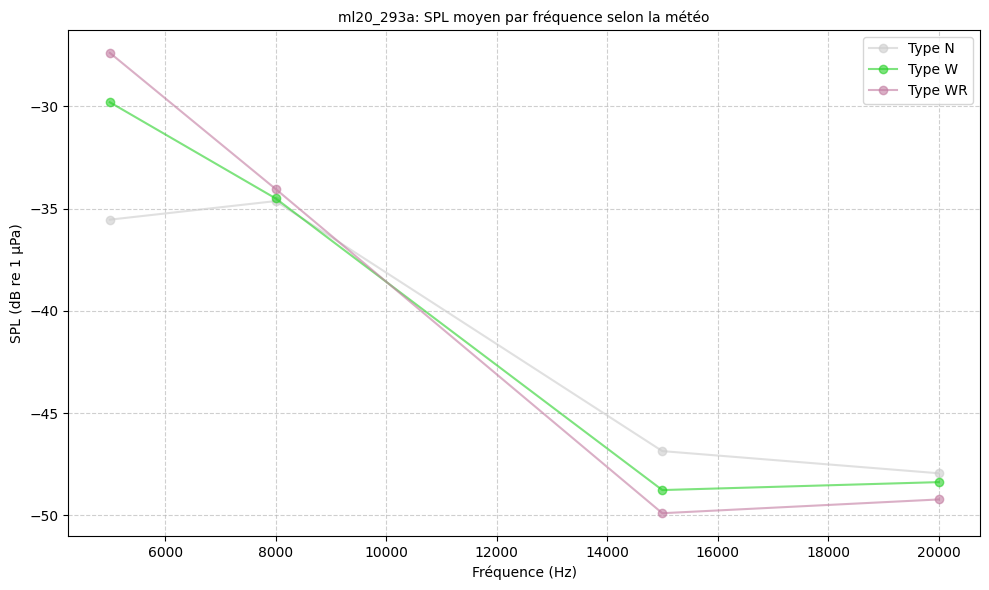

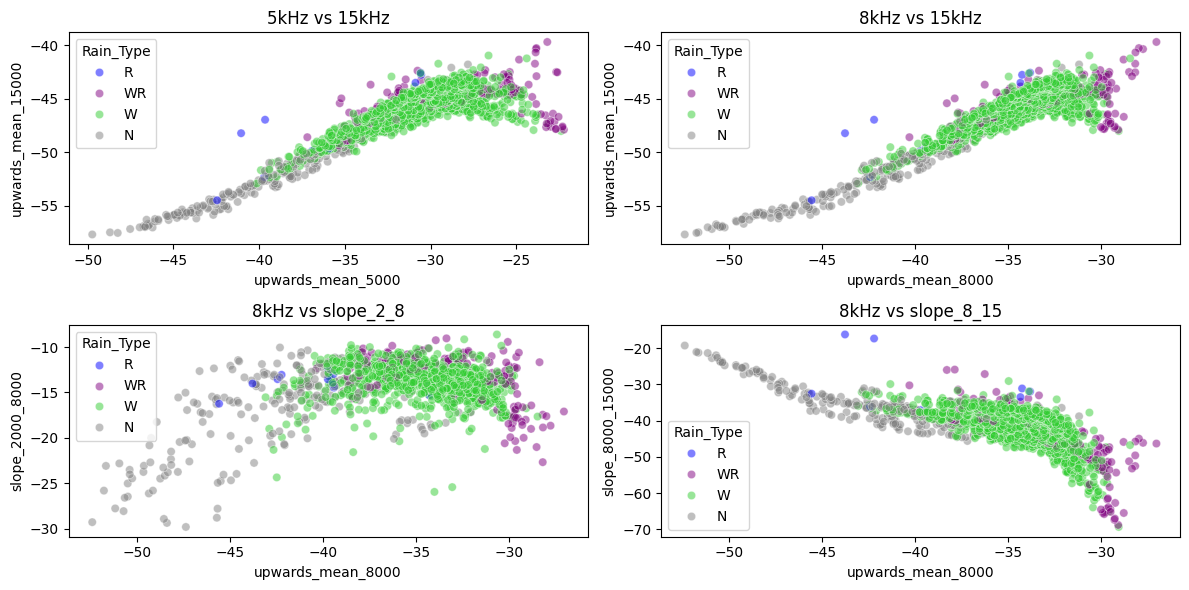

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


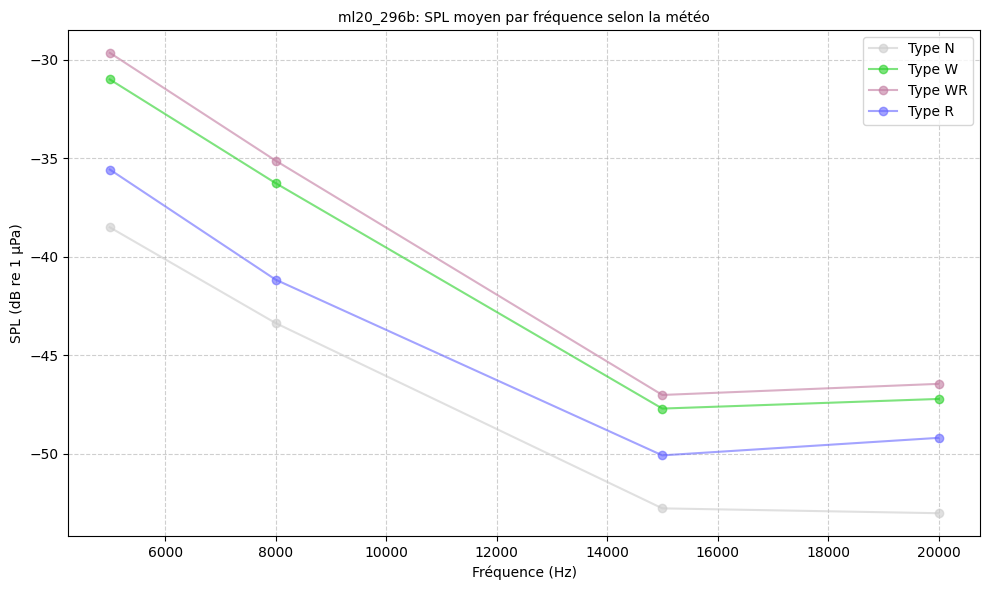

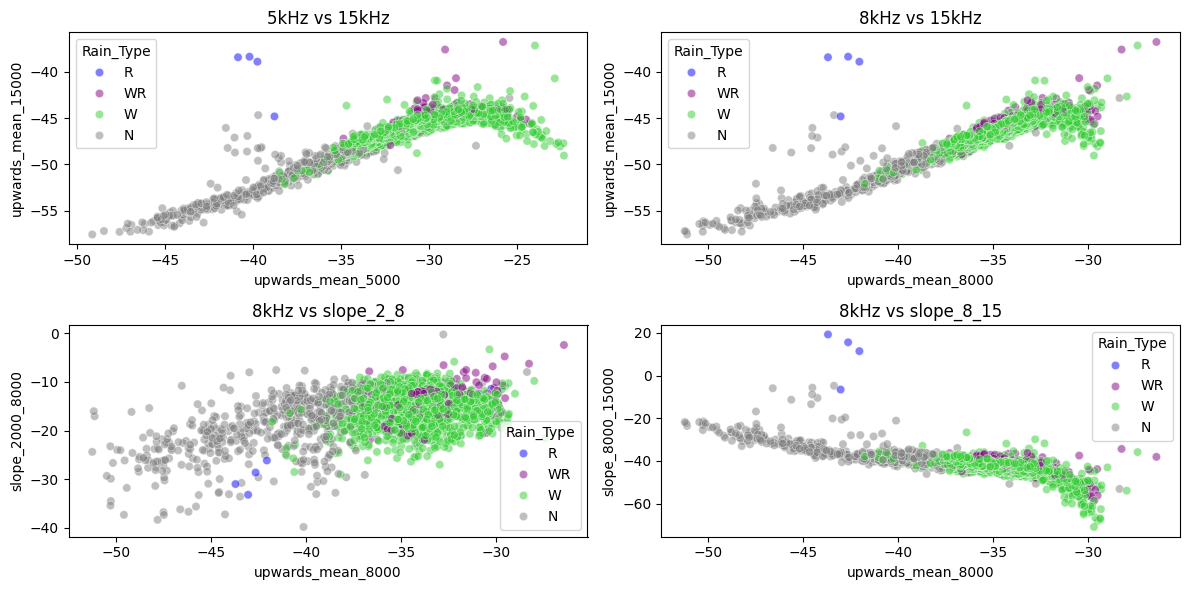

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


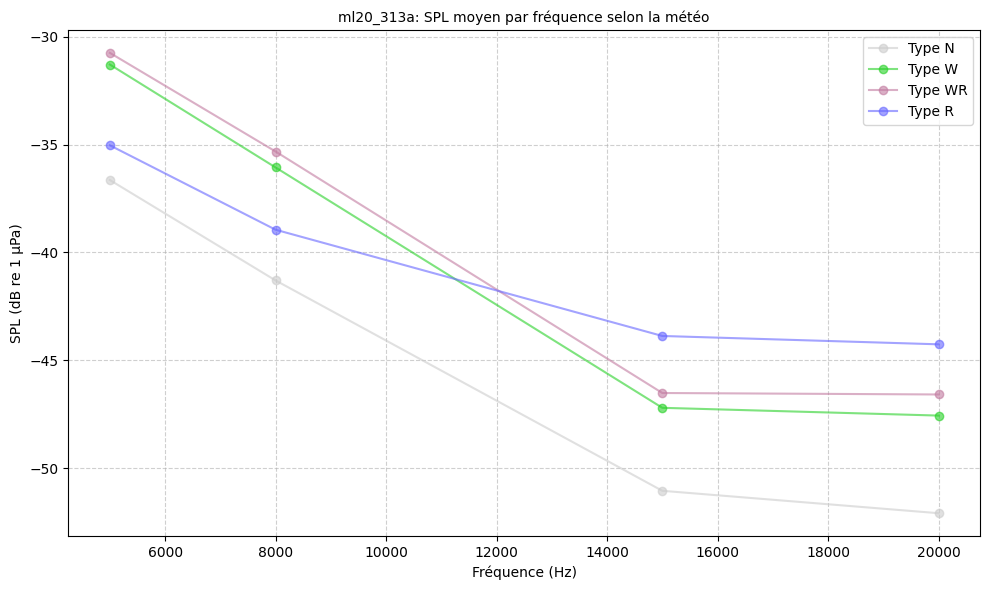

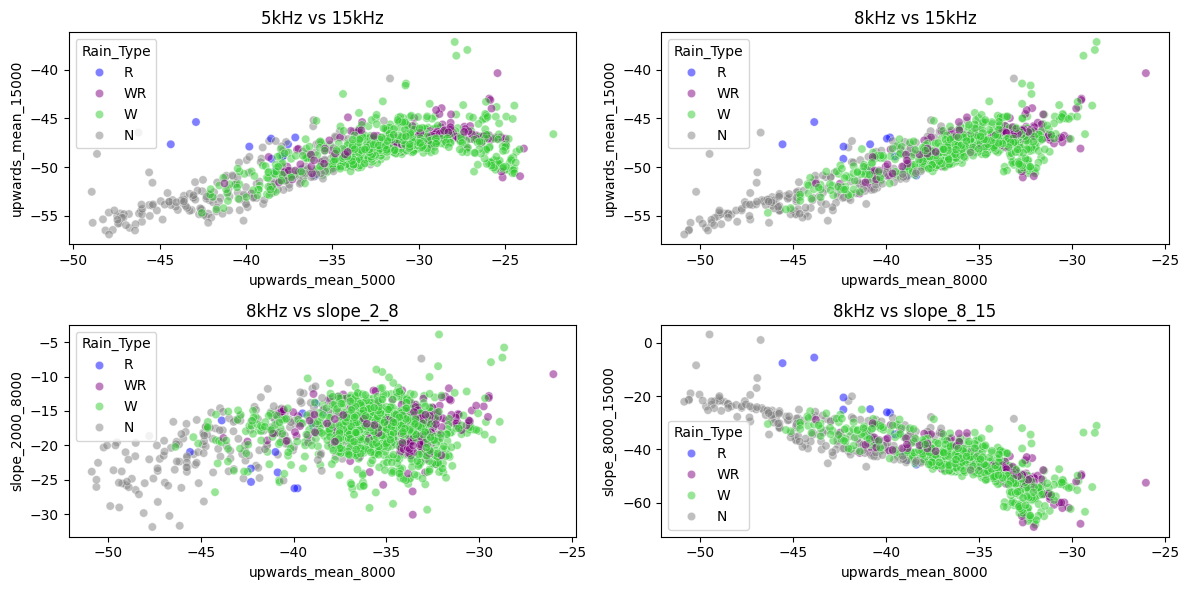

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


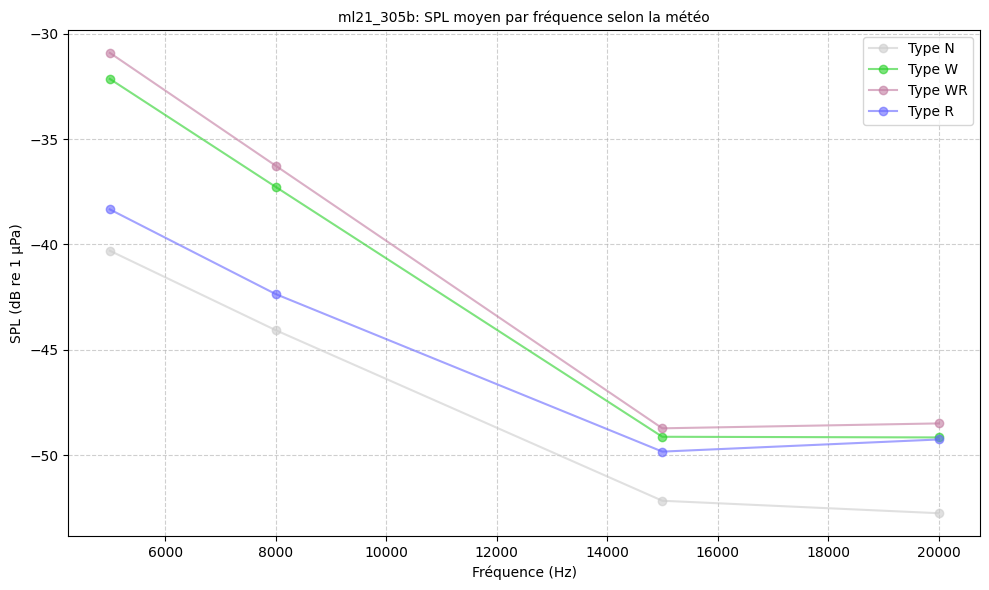

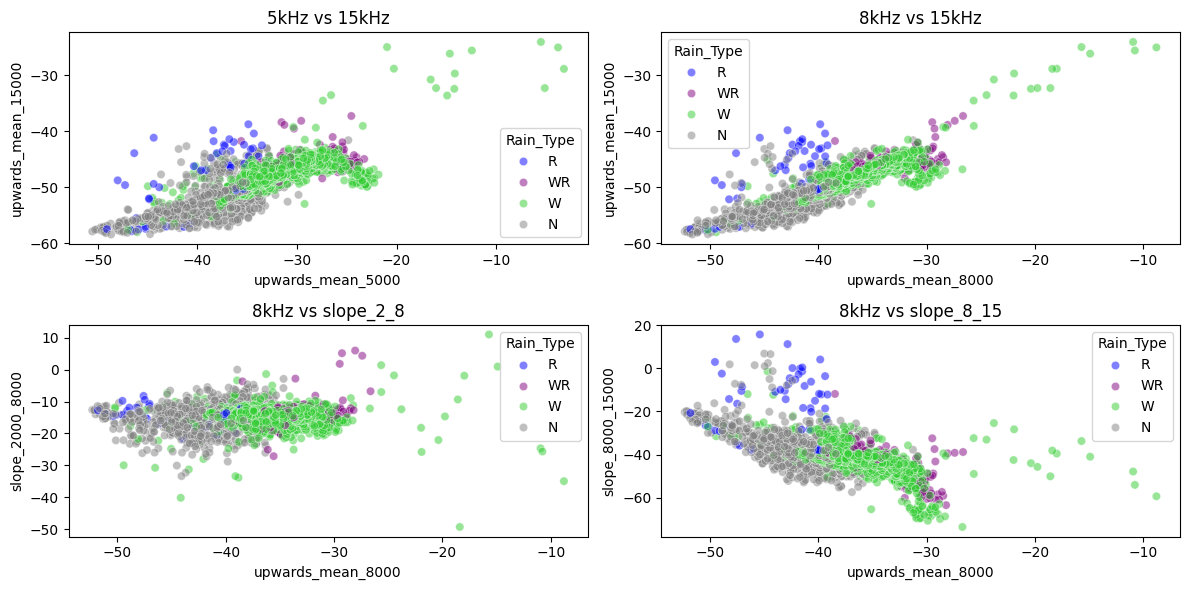

c:\Users\barsro\Documents\SES_tags\notebooks\../src\Biologging_Toolkit\utils\rain_empirical_utils.py:357: RuntimeWarning: Mean of empty slice
  mean_spl = np.nanmean(values, axis=0)
c:\Users\barsro\.conda\envs\rain\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


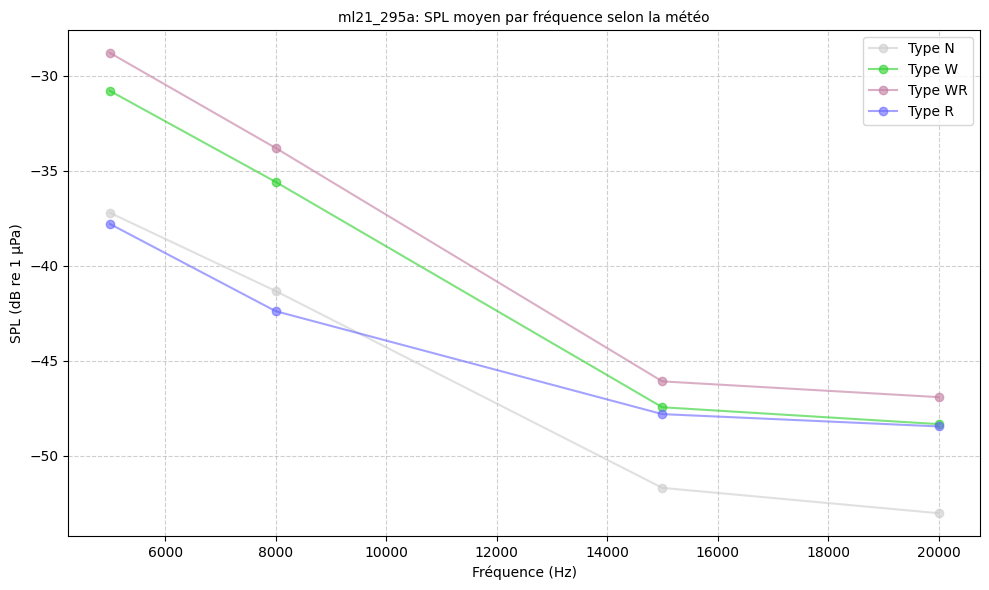

In [45]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]
feature="precipitation_GPM"
hue_order = ['R', 'WR', "W", "N"]
palette = {'R': 'blue', 'WR': 'purple', "W":"limegreen", "N":"grey"}
for depid in depids :
    df = R_Utils.load_df(depid, path, feature)
    df = detect_rain_from_ds_WR(df, feature)
    df = calculate_and_add_slope(df, freq1=2000, freq2=8000)
    df = calculate_and_add_slope(df, freq1=8000, freq2=15000)

    fig, axes = plt.subplots(2, 2, figsize=(12,6))
    sns.scatterplot(ax=axes[0][0], data=df, x='upwards_mean_5000', y='upwards_mean_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
    axes[0][0].set_title('5kHz vs 15kHz')
    sns.scatterplot(ax=axes[0][1], data=df, x='upwards_mean_8000', y='upwards_mean_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
    axes[0][1].set_title('8kHz vs 15kHz')
    sns.scatterplot(ax=axes[1][0], data=df, x='upwards_mean_8000', y='slope_2000_8000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
    axes[1][0].set_title('8kHz vs slope_2_8')
    sns.scatterplot(ax=axes[1][1], data=df, x='upwards_mean_8000', y='slope_8000_15000', hue='Rain_Type',hue_order=hue_order, palette=palette,alpha=0.5)
    axes[1][1].set_title('8kHz vs slope_8_15')
    plt.tight_layout()
    plt.show()

    R_Utils.plot_spl_by_rain_type(df, freqs=[2000,5000,8000,15000,20000], depid=depid, precip_value="precipitation_GPM", fill=False)


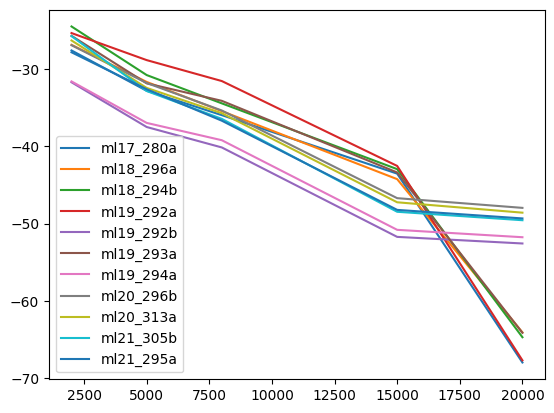

In [46]:
for depid in depids :
    df = R_Utils.load_df(depid, path, feature)
    plt.plot([2000,5000,8000,15000,20000], [np.mean(df["upwards_mean_2000"]),np.mean(df["upwards_mean_5000"]),np.mean(df["upwards_mean_8000"]),np.mean(df["upwards_mean_15000"]),np.mean(df["upwards_mean_20000"])], label=depid)
plt.legend()
plt.show()

In [ ]:
depid_test = "ml17_280a"
train_df = df.loc[df["depid"]!=depid_test].copy()
test_df = df.loc[df["depid"]==depid_test].copy()
optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial : R_Utils.objective_DE_Ma_Nystuen_2005(trial, train_df), n_trials=200, show_progress_bar=True)
best_params = study.best_params
print(best_params)
opt_results_class = R_Utils.DE_Ma_Nystuen_2005(test_df, **best_params)

  0%|          | 0/200 [00:00<?, ?it/s]

{'cond_1': 391.8746749554731, 'cond_2': 15.071554758450867, 'cond_3': 63.73504494841242, 'cond_4': 19.37902332412813}


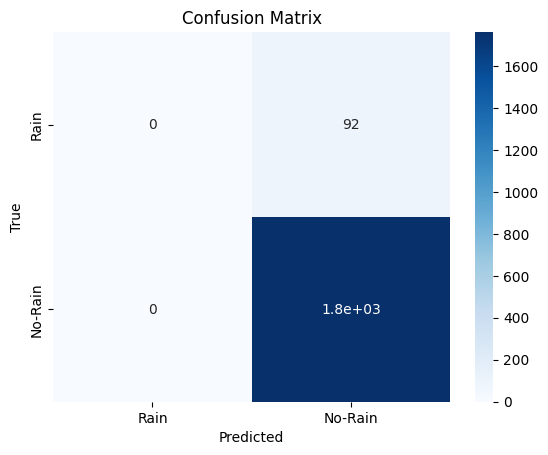

In [7]:
# labels = ["D", "HR", "MR", "RW", "None"]
labels = ["Rain","No-Rain"]
cf_matrix = confusion_matrix(test_df["Rain_Type"], opt_results_class["Rain_Type_Preds"], labels=labels)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Khiops Classifier

In [59]:
def detect_binary_rain_from_ds(df, feature, factor):
    df["Rain_Type"] = "None"
    intensity = df[feature] * factor 

    df.loc[(intensity >= 1) , "Binary_Rain_Type"] = 1
    df.loc[(intensity <1) , "Binary_Rain_Type"] = 0

    return df

In [84]:
depid = "ml17_280a"
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
feature = "tpmaxPool"
factor = 1000 if feature.startswith('tp') else 1
# df = df.dropna(subset=["begin_time", "upwards_mean_5000", "upwards_mean_8000", "wind_speed", feature])
df = detect_binary_rain_from_ds(df, feature, factor)

df = df[["upwards_mean_2000", "upwards_mean_5000", "upwards_mean_8000", "upwards_mean_15000", "upwards_mean_20000","Binary_Rain_Type"]]
print(df["Binary_Rain_Type"].value_counts())

Binary_Rain_Type
0.0    1658
1.0     201
Name: count, dtype: int64


In [85]:
train_df, test_df = train_test_split(
    df, test_size=0.3, random_state=1,
    stratify=df["Binary_Rain_Type"]
)

X_train = train_df.drop("Binary_Rain_Type", axis=1)
X_test = test_df.drop("Binary_Rain_Type", axis=1)
y_train = train_df["Binary_Rain_Type"]
y_test = test_df["Binary_Rain_Type"]

khc = KhiopsClassifier(n_trees=500)

khc.fit(X_train, y_train)
y_test_pred = khc.predict(X_test)

Test R2  = -0.12048192771084332
Test MAE = 0.10752688172043011


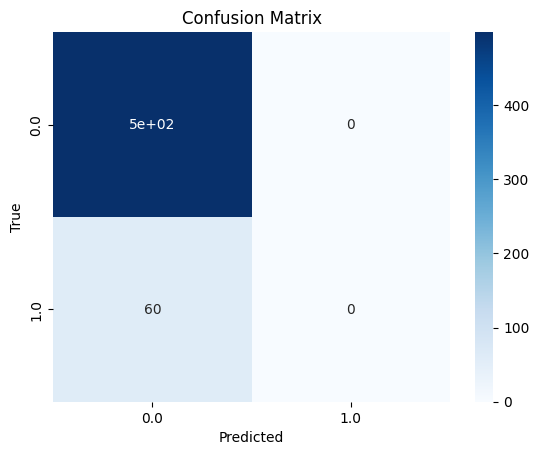

In [86]:
test_r2 = metrics.r2_score(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"Test R2  = {test_r2}")
print(f"Test MAE = {test_mae}")
labels = [0.0, 1.0]
cf_matrix = confusion_matrix(y_test, y_test_pred, labels=labels)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 2 Estimation

---
Fit avec instance Wind()

---

In [3]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]#,'ml20_293a'
feature="precipitation_GPM"
df = pd.DataFrame({})
for depid in depids :
    df = pd.concat([df, R_Utils.load_df(depid, path, feature)], ignore_index=True)

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -12.930991832754106, 'b': 21.80551216537248}


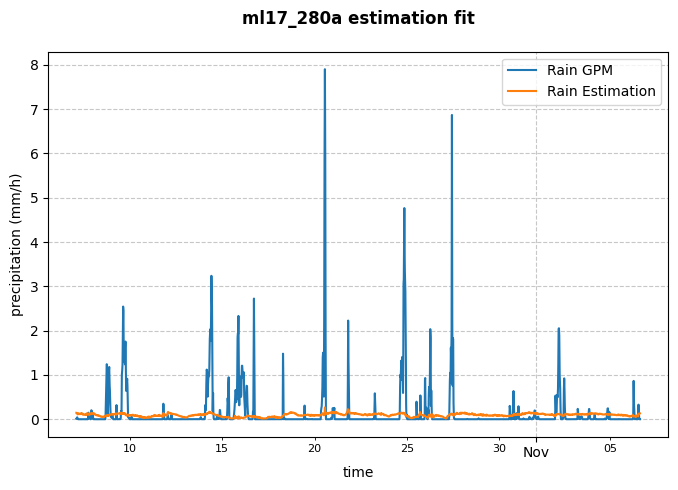

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -13.696169628546214, 'b': 21.760779405802715}


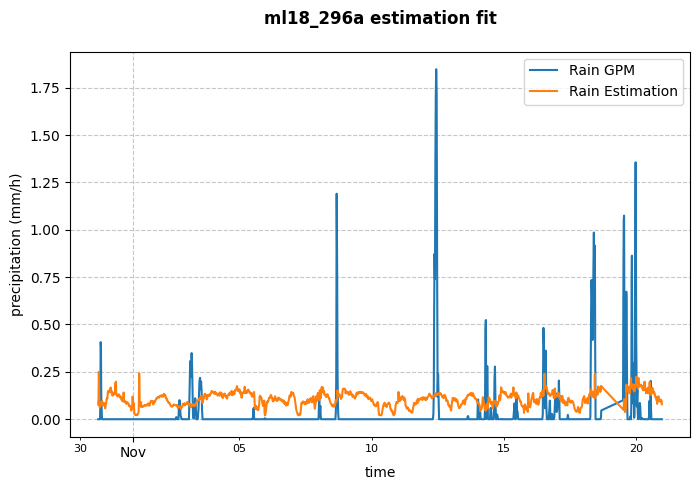

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -12.001397849172701, 'b': 22.80295554364214}


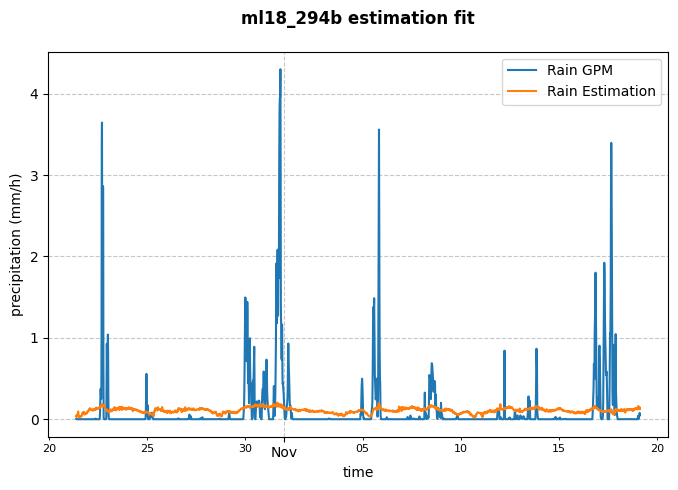

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -14.199021792164402, 'b': 21.33683899822158}


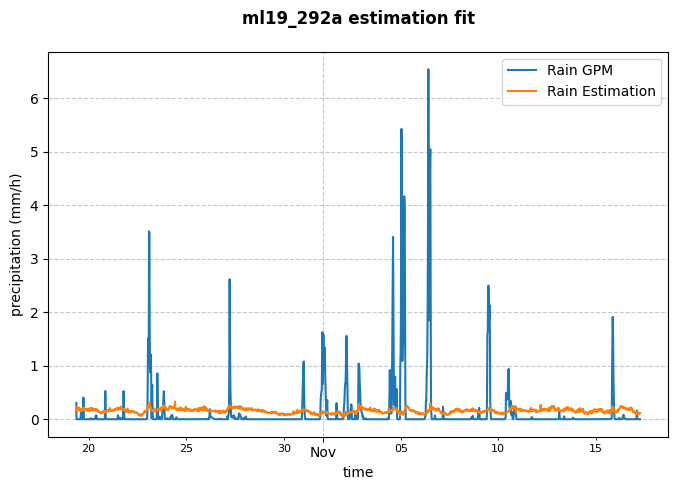

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -14.103393758083753, 'b': 20.165521493912767}


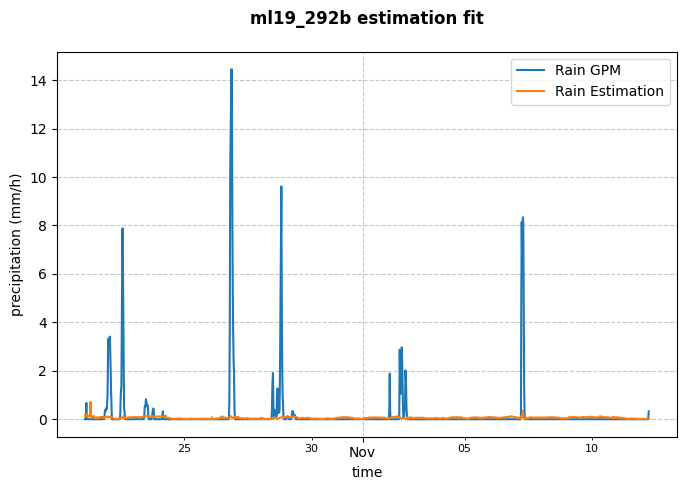

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -12.107528251874019, 'b': 23.03246894156866}


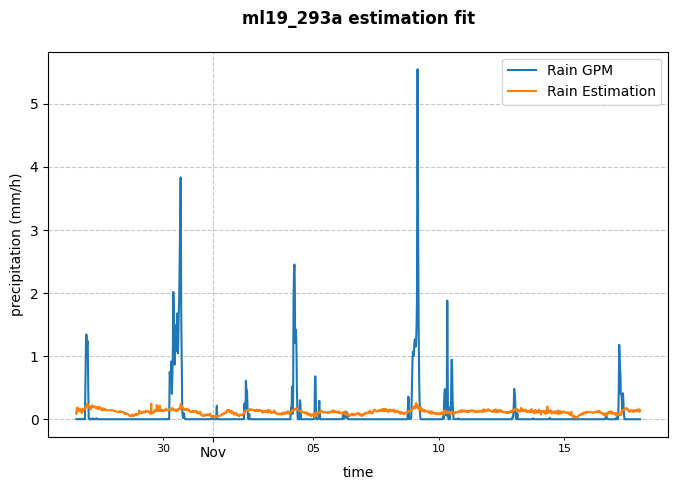

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -14.525925489109708, 'b': 20.000731819668353}


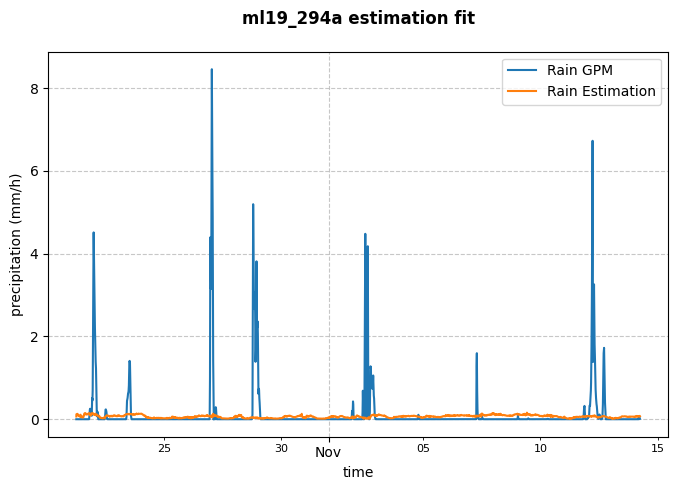

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -13.07535292858822, 'b': 22.04801702793778}


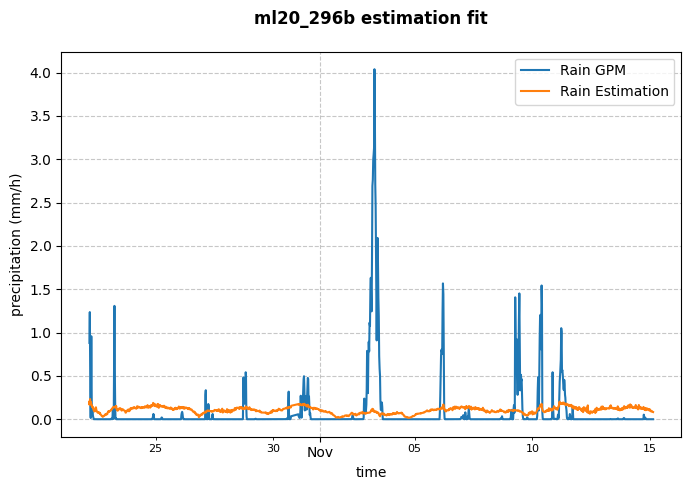

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -13.381506864868067, 'b': 22.221991124124706}


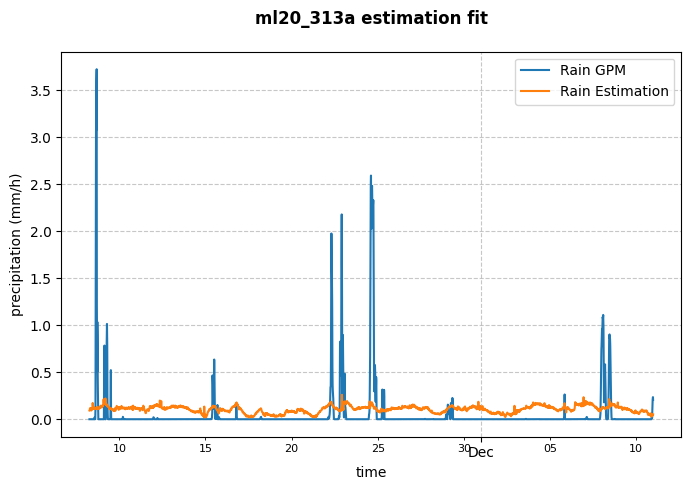

  0%|          | 0/500 [00:00<?, ?it/s]

{'a': -13.577468104757475, 'b': 21.434733885134673}


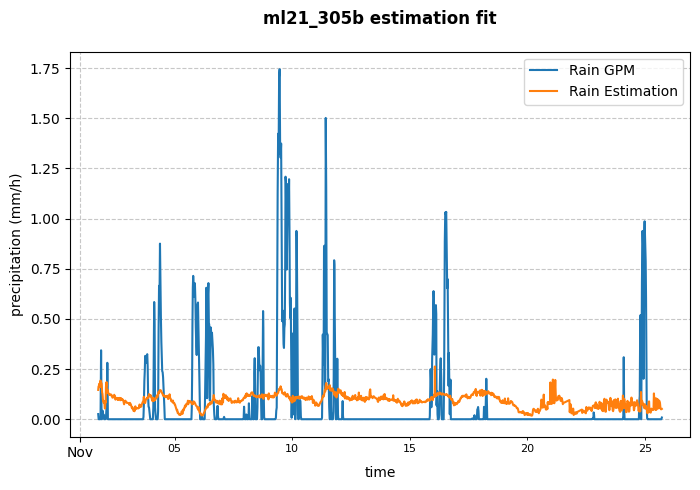

  0%|          | 0/500 [00:00<?, ?it/s]

c:\Users\barsro\.conda\envs\rain\Lib\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


{'a': -22.250214825280484, 'b': 11.792039636387493}


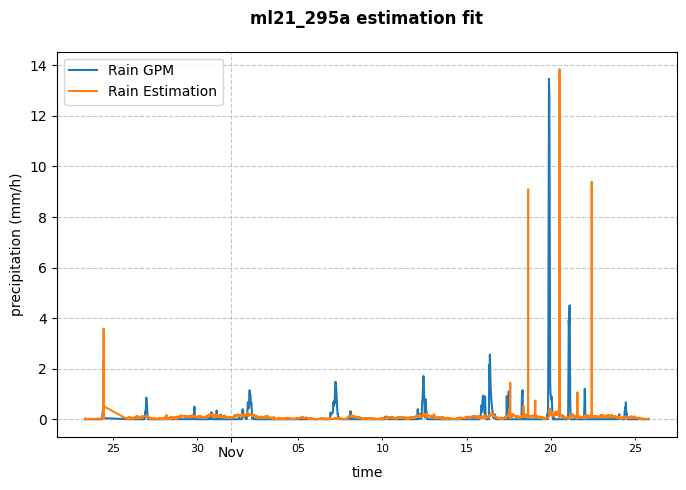

In [4]:
for depid_test in depids :
    train_df = df.loc[df["depid"]!=depid_test]
    test_df = df.loc[df["depid"]==depid_test]
    optuna.logging.set_verbosity(optuna.logging.ERROR)
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial : R_Utils.objective_Nystuen_8_KHz(trial, train_df, feature), n_trials=500, show_progress_bar=True)
    best_params = study.best_params
    print(best_params)
    rain_est = R_Utils.RE_Nystuen_8KHz(test_df, **best_params)

    R_Utils.plot_estimation_vs_ground_truth(test_df, depid_test, feature, rain_est)

---
Fit() sur un depid et analyse des perfs sur les autres

--- 

In [ ]:
depids = ['ml17_280a','ml18_296a', "ml18_294b", 'ml19_292a','ml19_292b','ml19_293a','ml19_294a','ml20_293a','ml20_296b','ml20_313a','ml21_305b',"ml21_295a"]
feature = "precipitation_GPM"
results = {}

fit_depid='ml17_280a'
df = R_Utils.load_df(fit_depid, path, feature)
optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial : R_Utils.objective_Nystuen_8_KHz(trial, df, feature), n_trials=200, show_progress_bar=True)
best_params = study.best_params

if fit_depid not in results:
    results[fit_depid] = {}

for test_depid in depids :
    df = R_Utils.load_df(test_depid,path, feature)
    rain_est = R_Utils.RE_Nystuen_8KHz(df, **best_params)
    if test_depid not in results[fit_depid]:
        results[fit_depid][test_depid] = {}
    
    results[fit_depid][test_depid]["MSE"] = mean_squared_error(df[feature], rain_est)
    results[fit_depid][test_depid]["rRMSE"] = root_mean_squared_error(df[feature], rain_est)/np.mean(df[feature])
    results[fit_depid][test_depid]["MAE"] = mean_absolute_error(df[feature], rain_est)
    results[fit_depid][test_depid]["CC"] = np.corrcoef(df[feature], rain_est)
    
    residuals = df[feature] - rain_est
    n = len(df[feature])
    SEE = np.sqrt(np.sum(residuals**2) / (n - 2))
    results[fit_depid][test_depid]["SEE"] = SEE

  0%|          | 0/200 [00:00<?, ?it/s]

c:\Users\barsro\.conda\envs\rain\Lib\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


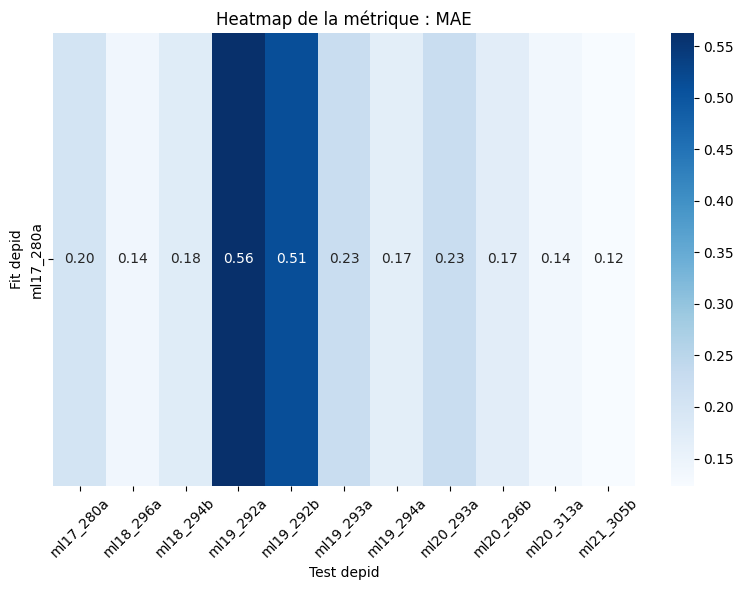

In [7]:
metric = 'MAE'

df = pd.DataFrame({
    y_true: {y_pred: results[y_true][y_pred][metric] for y_pred in results[y_true]}
    for y_true in results
}).T 

df = df.drop(columns="ml21_295a")

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap="Blues")
plt.title(f"Heatmap de la métrique : {metric}")
plt.xlabel("Test depid")
plt.xticks(rotation = 45)
plt.ylabel("Fit depid")
plt.tight_layout()
plt.show()

---
Nystuen Model by SPLX (Khz)

--- 

In [5]:
depid = "ml19_292b"
R_Utils.load_df(depid, path, "precipitation_GPM")
available_SPL = ["upwards_mean_2000", "upwards_mean_5000", "upwards_mean_8000","upwards_mean_15000", "upwards_mean_20000"]

results = {}
for spl in available_SPL :

    optuna.logging.set_verbosity(optuna.logging.ERROR)
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: R_Utils.objective_Nystuen_X_KHz(trial, spl, feature), n_trials=200, show_progress_bar=True)
    best_params = study.best_params
    best_value = study.best_value

    if depid not in results:
        results[depid] = {}
    if spl not in results[depid]:
        results[depid][spl] = {}

    results[depid][spl]["best_params"] = best_params
    opt_results_RE_Nystuen_XKHz = R_Utils.RE_Nystuen_XKHz(df, **best_params)
    results[depid][spl]["MSE"] = mean_squared_error(df[feature]*factor, opt_results_RE_Nystuen_XKHz)
    results[depid][spl]["rRMSE"] = root_mean_squared_error(df[feature]*factor, opt_results_RE_Nystuen_XKHz)/np.mean(df[feature]*factor)
    results[depid][spl]["MAE"] = mean_absolute_error(df[feature]*factor, opt_results_RE_Nystuen_XKHz)
    results[depid][spl]["CC"] = np.corrcoef(df[feature]*factor, opt_results_RE_Nystuen_XKHz)
    
    residuals = df[feature]*factor - opt_results_RE_Nystuen_XKHz
    n = len(df[feature])
    SEE = np.sqrt(np.sum(residuals**2) / (n - 2))
    results[depid][spl]["SEE"] = SEE

  0%|          | 0/200 [00:00<?, ?it/s]

TypeError: string indices must be integers, not 'str'

In [147]:
def extract_number(s: str) -> int:
    return int(s.split('_')[-1])
def get_formatted_val(value):
    return str(round(value,2)).rjust(5, ' ')

In [152]:
print("  SPL", "  MAE", "   CC", "  MSE", "rRMSE")
for spl in results["ml18_294b"]:
    print(str(extract_number(spl)).rjust(5, ' '),
           get_formatted_val(results["ml18_294b"][spl]["MAE"]), 
           get_formatted_val(results["ml18_294b"][spl]["CC"][1][0]), 
           get_formatted_val(results["ml18_294b"][spl]["MSE"]), 
           get_formatted_val(results["ml18_294b"][spl]["rRMSE"]))

  SPL   MAE    CC   MSE rRMSE
 2000  0.12  0.37  0.15  3.54
 5000  0.11  0.47  0.15   3.5
 8000  0.13  0.52  0.11  2.97
15000 42.47  0.51 6876.89 747.41
20000  0.97  0.31  1.02  9.11


In [32]:
d_df = [datetime.fromtimestamp(ts) for ts in df['begin_time']]

fig = px.scatter(
    df,
    x=d_df,
    y=df[feature] * factor,
    color=df["wind_speed"],
    color_continuous_scale="Viridis",
    hover_data={'dive_number': df["dive"],'wind(m/s)': df["wind_speed"]},
    title = f'Visualisation pluie pour dataset {depid} : {feature}'
)

fig.add_trace(
    go.Scatter(
        x=d_df,
        y=df[feature] * factor,
        mode='lines',
        name=feature,
        line=dict(color='lightgray'),
        hovertemplate='<b>Dive Number:</b> %{customdata[0]}<br><b>Wind:</b> %{customdata[1]}<br><b>Rain (GPM):</b> %{y}<extra></extra>',
        customdata= df[['dive', "wind_speed"]]
    )
)

fig.add_trace(
    go.Scatter(
        x=d_df,
        y=opt_results_RE_Nystuen_8KHz,
        mode='lines',
        name='Nystuen estimation',
        line=dict(color='royalblue'),
        hovertemplate='<b>Dive Number:</b> %{customdata[0]}<br><b>Wind:</b> %{customdata[1]}<br><b>Rain (REG):</b> %{y}<extra></extra>',
        customdata= df[['dive', "wind_speed"]]
    )
)

fig.update_layout(
    xaxis=dict(
        tickformat='%b %d',
    ),
    coloraxis_colorbar=dict(
        title="Wind Speed",
        x=1.05,  # Move the color bar to the right
        xanchor="left"
    ),
    legend=dict(
        x=1,
        xanchor="right",
        y=1,
        yanchor="top"
    ),
    xaxis_title='Date',
    yaxis_title=feature,
)

fig.show()

observations : 
- les seuls moments où le modèle Nystuen8KHz invente de la pluie c'est quand il y a du vent. 
- La combinaison : pas de vent, pas de pluie, mais un modèle qui estime de la pluie; n'existe pas

On peut ainsi noter les numéros des plongées interressantes pour pouvoir observer leurs spectrogrammes

| Dive n° | Wind (m/s) | Rain(GPM) (mm/h) | Rain(Model) (mm/h) | SPL2 | SPL5 | SPL8 | SPL15 | SPL20 |
|---------|------------|------------------|--------------------|------|------|------|-------|-------|
| 806     | 11.9       | 7.9              | 5.0                | -20.8| -22.6| -25.5| -36.0 | -66.9 |
| 546     | 4.8        | 2.3              | 0                  | -35.7| -45.2| -48.6| -49.3 | -69.4 |
| 832     | 18.7       | 0.6              | 0.2                | -18.8| -24.4| -30.2| -43.1 | -65.8 |
| 238     | 4.9        | 0                | 0                  | -36.9| -42.4| -44.5| -51.4 | -71.3 |
| 1064    | 13.7       | 4.7              | 0.3                | -24.1| -28.4| -31.6| -39.8 | -64.8 |
| 880     | 15.6       | 0.8              | 2.5                | -20.2| -22.9| -27.0| -39.6 | -66.2 |


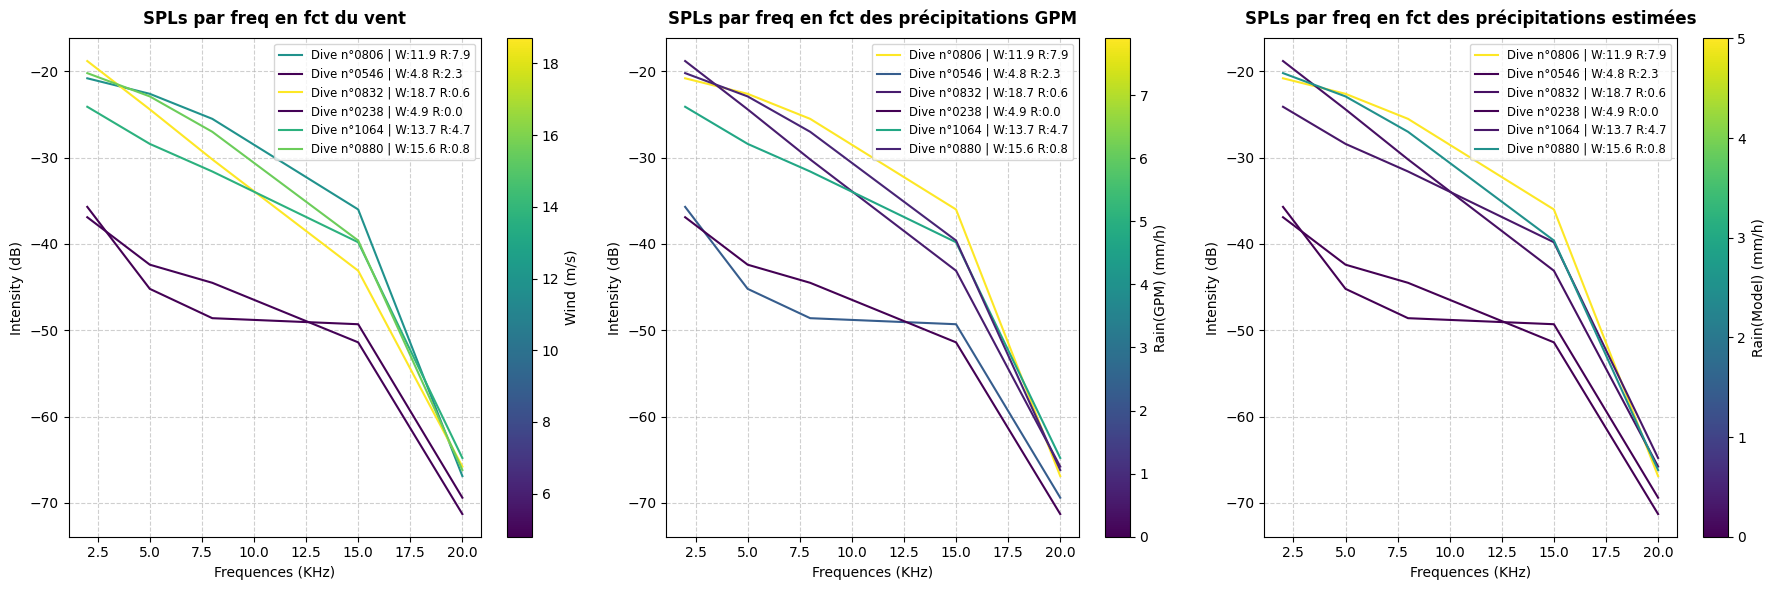

In [12]:
df = pd.read_csv("../../interesting_dives.csv")
df.head()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

def plot_spls(ax, df, color_by, title, cmap="viridis"):
    norm = plt.Normalize(df[color_by].min(), df[color_by].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    for _, row in df.iterrows():
        ax.plot(
            [2, 5, 8, 15, 20],
            [row["SPL2"], row["SPL5"], row["SPL8"], row["SPL15"], row["SPL20"]],
            label=f"Dive n°{int(row['Dive n°']):04} | W:{row['Wind (m/s)']} R:{row['Rain(GPM) (mm/h)']}",
            color=sm.to_rgba(row[color_by])
        )

    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(color_by)

    ax.set_xlabel("Frequences (KHz)")
    ax.set_ylabel("Intensity (dB)")
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.legend(loc='upper right', fontsize='small')
    ax.grid(True, linestyle="--", alpha=0.6)

plot_spls(axes[0], df, "Wind (m/s)", "SPLs par freq en fct du vent")
plot_spls(axes[1], df, "Rain(GPM) (mm/h)", "SPLs par freq en fct des précipitations GPM")
plot_spls(axes[2], df, "Rain(Model) (mm/h)", "SPLs par freq en fct des précipitations estimées")

plt.tight_layout()
plt.show()


Observations Vent
|Vent | pas de Vent |
|-----|-------------|
|max de vent ne corresponds pas au SPL_max | Offset vertical négatif pour les données avec peu de vent |

Observations Pluie
|Pluie | pas de Pluie |
|-----|-------------|
|SPL15, SPL8 max sont atteintes pour les  precipitations les plus importantes| Se confondent avec les autres courbes avec pluie surement à cause du vent (sauf 832 comme pas de vent) |

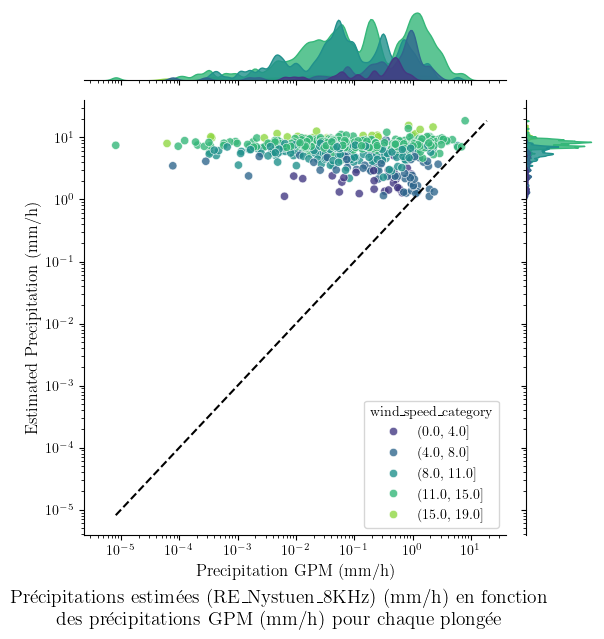

In [ ]:
R_Utils.plot_RainGPMRain_scatter(depid="ml17_280a",path=path, estimated_rain=opt_results_RE_Nystuen_8KHz, var_name="RE_Nystuen_8KHz")

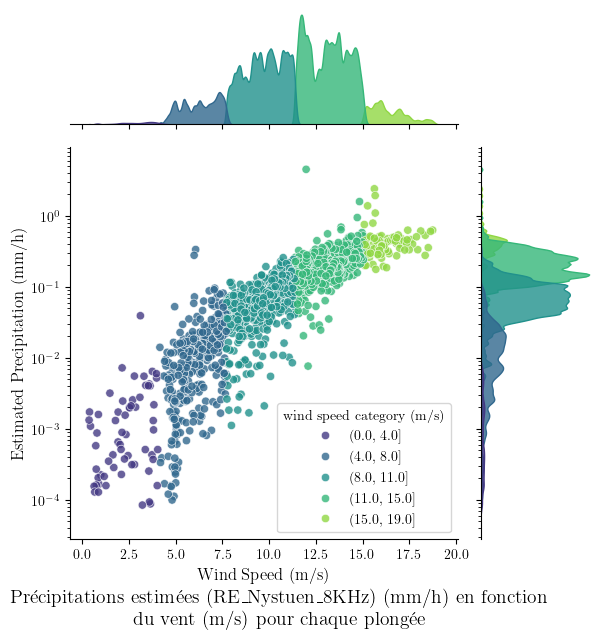

In [ ]:
R_Utils.plot_WindRain_scatter(depid="ml17_280a",path=path, estimated_rain=opt_results_RE_Nystuen_8KHz, var_name="RE_Nystuen_8KHz")

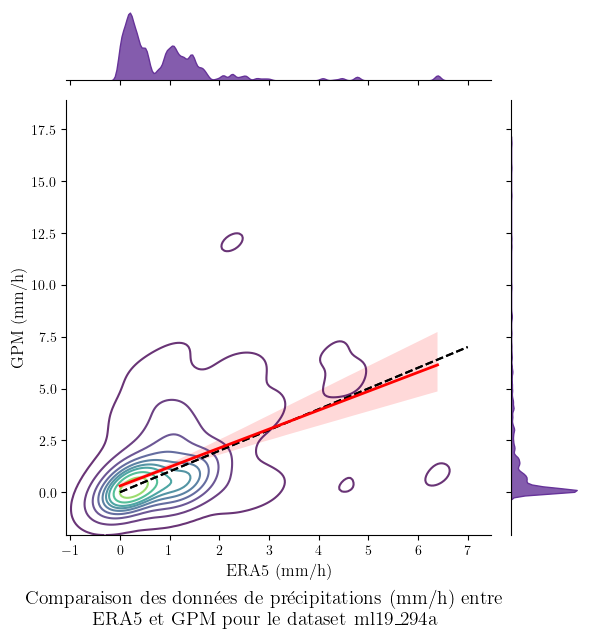

In [ ]:
R_Utils.plot_RainSourcesDifferences_scatter(depid="ml19_294a",path=path, source1="tpmaxPool", source2="precipitation_GPM", var_name1="ERA5", var_name2="GPM", useLog=False, palette = "viridis")

### Histogramme Spectral Slope

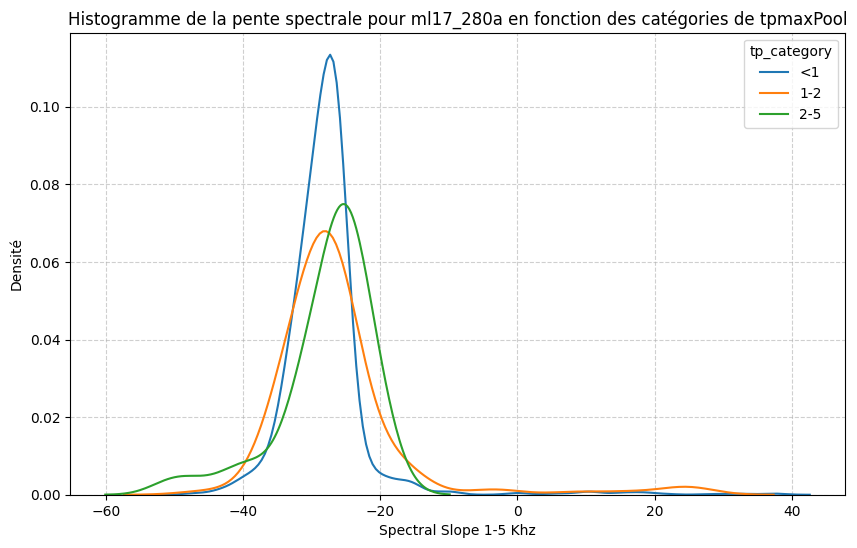

In [13]:
depif = "ml17_280a"
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
feat = "tpmaxPool"

if feat == "precipitation_GPM" :
    df['tp_category'] = pd.cut(df['precipitation_GPM'], bins=[0, 1, 2, 5, float('inf')], 
                            labels=['<1', '1-2', '2-5', '>5'], right=False)
else :
    df['tp_category'] = pd.cut(df['tpmaxPool'], bins=[0, 0.001, 0.002, 0.005, float('inf')], 
                            labels=['<1', '1-2', '2-5', '>5'], right=False)

# plt.figure(figsize=(10, 6))
# sns.kdeplot(data=df, x='SpecSlope1-5', hue='tp_category')
# # sns.kdeplot(data=df, x='SpecSlope1-5', hue='tp_category',common_norm=False)
# plt.title(f"Histogramme de la pente spectrale pour {depid} en fonction des catégories de tp")
# plt.xlabel("Spectral Slope 1-5 Khz")
# plt.ylabel("densité")
# plt.legend(title='tp_category', loc='upper right')
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.show()

plt.figure(figsize=(10, 6))
for category in df['tp_category'].unique():
    sns.kdeplot(data=df[df['tp_category'] == category], x='slope_8_15', label=category)
plt.title(f"Histogramme de la pente spectrale pour {depid} en fonction des catégories de {feat}")
plt.xlabel("Spectral Slope 1-5 Khz")
plt.ylabel("Densité")
plt.legend(title='tp_category', loc='upper right')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### All Models

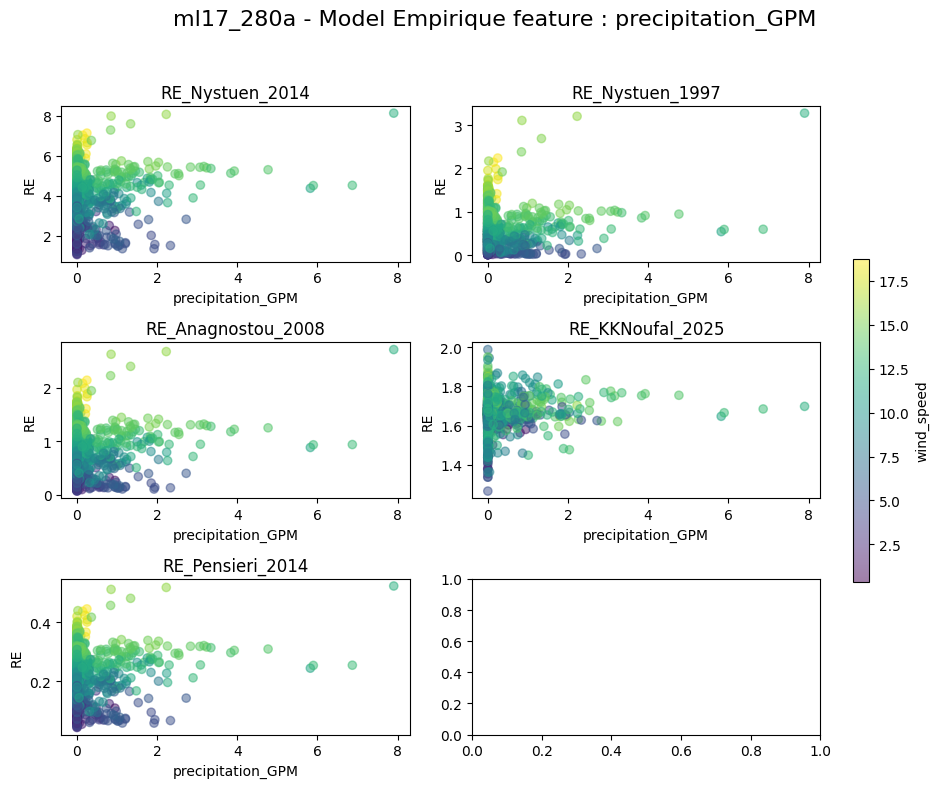

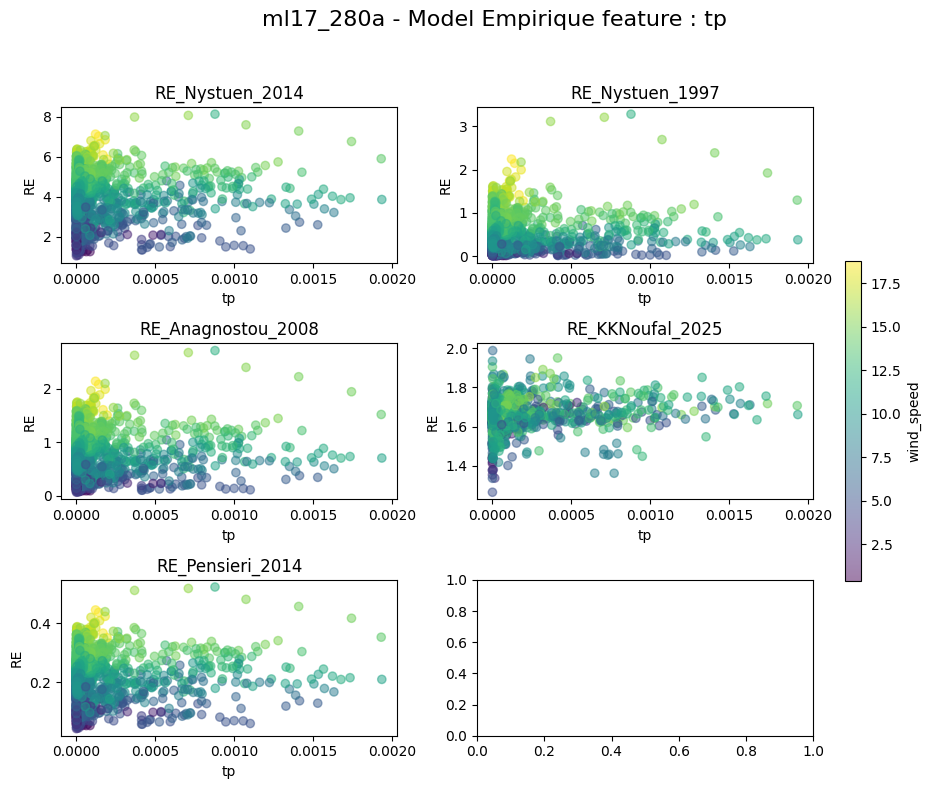

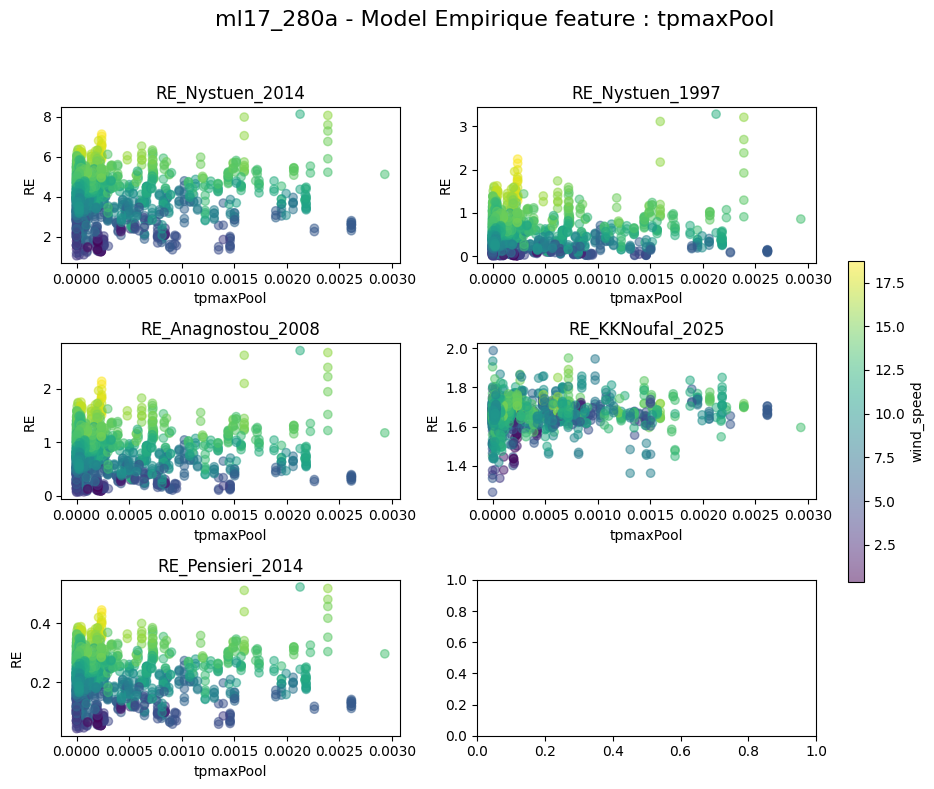

In [143]:
depid = depids[0]
df = pd.read_csv(path + f'/{depid}/{depid}_dive.csv')
features = ['precipitation_GPM','tp','tpmaxPool']

for feature in features:
    fig, axs = plt.subplots(3, 2, figsize=(10, 8))
    fig.suptitle(f"{depid} - Model Empirique feature : {feature}", fontsize=16)

    # -------- Plot 1: Nystuen 2014
    rslts = RE_Nystuen_2014(df)
    sc1 = axs[0, 0].scatter(df[feature], rslts, c=df['wind_speed'], cmap='viridis', alpha=0.5)
    axs[0, 0].set_title('RE_Nystuen_2014')
    axs[0, 0].set_xlabel(feature)
    axs[0, 0].set_ylabel('RE')

    # -------- Plot 2: Nystuen 1997
    rslts = RE_Nystuen_1997(df)
    sc2 = axs[0, 1].scatter(df[feature], rslts, c=df['wind_speed'], cmap='viridis', alpha=0.5)
    axs[0, 1].set_title('RE_Nystuen_1997')
    axs[0, 1].set_xlabel(feature)
    axs[0, 1].set_ylabel('RE')

    # -------- Plot 3: Anagnostou 2008
    rslts = RE_Anagnostou_2008(df)
    sc3 = axs[1, 0].scatter(df[feature], rslts, c=df['wind_speed'], cmap='viridis', alpha=0.5)
    axs[1, 0].set_title('RE_Anagnostou_2008')
    axs[1, 0].set_xlabel(feature)
    axs[1, 0].set_ylabel('RE')

    # -------- Plot 4: KKNoufal 2025
    rslts = RE_KKNoufal_2025(df)
    sc4 = axs[1, 1].scatter(df[feature], rslts, c=df['wind_speed'], cmap='viridis', alpha=0.5)
    axs[1, 1].set_title('RE_KKNoufal_2025')
    axs[1, 1].set_xlabel(feature)
    axs[1, 1].set_ylabel('RE')

    # -------- Plot 5: Pensieri 2014
    rslts = RE_Pensieri_2014(df)
    sc5 = axs[2, 0].scatter(df[feature], rslts, c=df['wind_speed'], cmap='viridis', alpha=0.5)
    axs[2, 0].set_title('RE_Pensieri_2014')
    axs[2, 0].set_xlabel(feature)
    axs[2, 0].set_ylabel('RE')

    # -------- Layout + colorbar
    fig.tight_layout(rect=[0, 0, 0.9, 0.95])
    cbar = fig.colorbar(sc4, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('wind_speed')

    plt.show()
